In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
from scipy import stats

In [2]:

from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/DS111 - ĐỒ ÁN/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(DATA_PATH + "data_processed_for_analysis.csv")

/tmp/ipython-input-1015744847.py:1: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH + "data_processed_for_analysis.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117017 entries, 0 to 117016
Data columns (total 42 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   is_canceled                           117017 non-null  int64  
 1   lead_time                             117017 non-null  int64  
 2   arrival_date_year                     117017 non-null  int64  
 3   arrival_date_month                    117017 non-null  object 
 4   arrival_date_week_number              117017 non-null  int64  
 5   arrival_date_day_of_month             117017 non-null  int64  
 6   stays_in_weekend_nights               117017 non-null  int64  
 7   stays_in_week_nights                  117017 non-null  int64  
 8   adults                                117017 non-null  int64  
 9   children                              117017 non-null  int64  
 10  babies                                117017 non-null  int64  
 11  

In [5]:
df['previous_cancellations_group'] = df['previous_cancellations_group'].astype(str)
df['previous_bookings_not_canceled_group'] = df['previous_bookings_not_canceled_group'].astype(str)

In [6]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols

Index(['arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'city', 'hotel_type',
       'previous_cancellations_group', 'previous_bookings_not_canceled_group',
       'booking_changes_group', 'days_in_waiting_list_group'],
      dtype='object')

In [7]:
numerical_cols = df.select_dtypes(include="number").columns
numerical_cols

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'has_company', 'has_agent',
       'reservation_status_day', 'reservation_status_month',
       'reservation_status_year', 'total_guests', 'total_stays'],
      dtype='object')

# Phân tích đơn biến

In [8]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'city', 'has_company',
       'has_agent', 'reservation_status_day', 'reservation_status_month',
       'reservation_status_year', 'hotel_type', 'previous_cancellations_group',
       'previous_bookings_not_canceled_group', 'booking_changes_group',
       'days_in_waiting_list_group', 'total_guests', 'total_stays'],
      dtype='object')

## Phân loại biến

In [9]:
numerical_cols

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'has_company', 'has_agent',
       'reservation_status_day', 'reservation_status_month',
       'reservation_status_year', 'total_guests', 'total_stays'],
      dtype='object')

In [10]:
# Biến nhị phân
binary_col = ["has_company", "has_agent", "is_repeated_guest"]
target_col = ["is_canceled"]

# Biến định lượng liên tục
continuous_col = ["lead_time", "adr"]

# Biến định lượng rời rạc
discrete_col = [col for col in numerical_cols if col not in continuous_col and col not in binary_col and col not in target_col]

## Biến định lượng

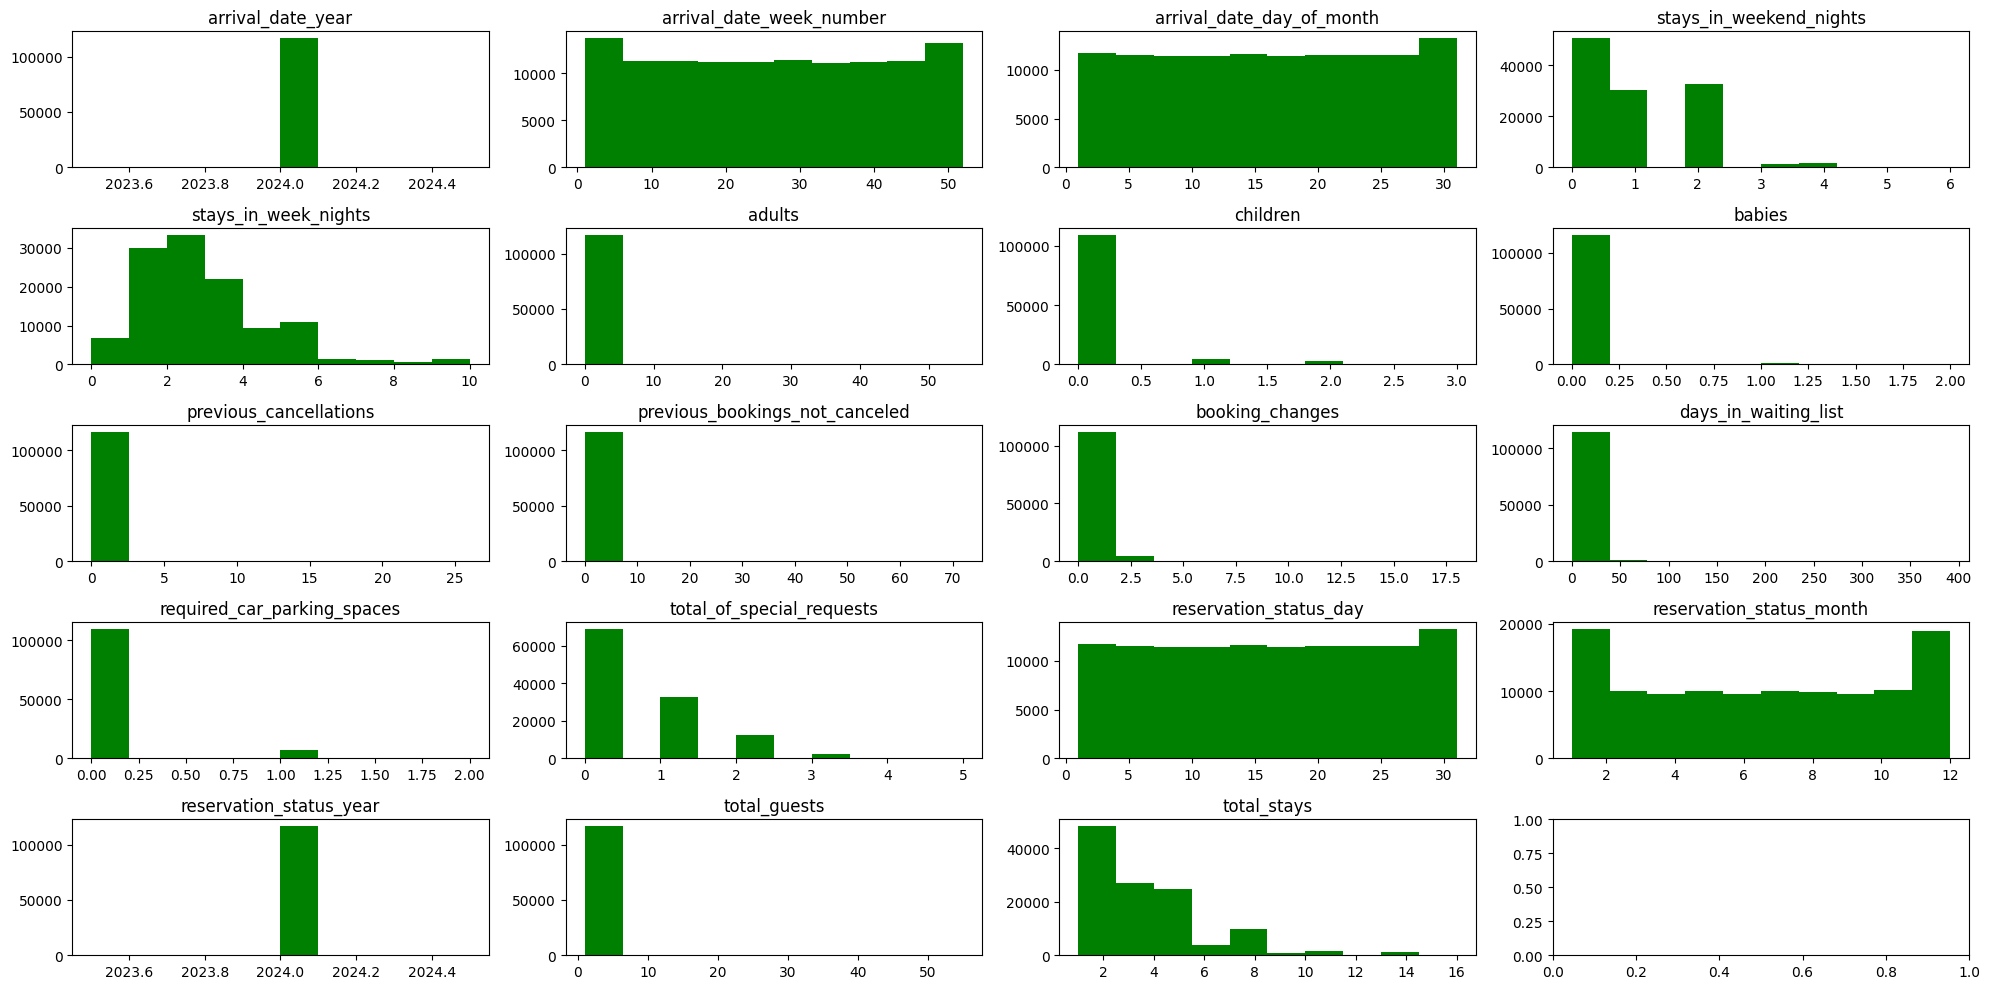

In [11]:
# Tần suất của các biến định lượng rời rạc
fig, axes = plt.subplots(5, 4, figsize=(20,10))
axes = axes.flatten()
for i, col in enumerate(discrete_col):
    axes[i].hist(df[col], color="green")
    axes[i].set_title(f"{col}")
plt.tight_layout()
plt.show()

* Nhận xét:
    - Các biến rời rạc hầu như tập trung nhiều ở một giá trị nhất định. Các biến rời rạc về thời gian phân bố đồng đều trong phạm vi giá trị của nó.

In [12]:
df["reservation_status_year"].unique()

array([2024])

In [13]:
df[df["required_car_parking_spaces"] > 1]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reservation_status_day,reservation_status_month,reservation_status_year,hotel_type,previous_cancellations_group,previous_bookings_not_canceled_group,booking_changes_group,days_in_waiting_list_group,total_guests,total_stays
136,0,44,2024,May,20,19,2,0,3,0,...,19,5,2024,Resort,0,0,>2,no_wait,3,2
2501,0,122,2024,November,44,3,1,3,2,0,...,3,11,2024,Resort,0,0,0,no_wait,2,4
5994,0,225,2024,August,34,24,2,3,2,0,...,24,8,2024,Resort,0,0,1-2,no_wait,2,5
8680,0,385,2024,March,12,22,1,4,2,0,...,22,3,2024,Resort,0,0,1-2,no_wait,2,5
15496,0,155,2024,October,40,6,4,6,2,0,...,6,10,2024,Resort,0,0,1-2,no_wait,2,10
21405,0,36,2024,July,27,7,2,5,2,0,...,7,7,2024,Resort,0,0,0,no_wait,2,7
21967,0,0,2024,April,16,15,2,1,2,0,...,15,4,2024,Resort,0,0,0,no_wait,2,3
22089,0,169,2024,September,39,23,1,3,2,0,...,23,9,2024,Resort,0,0,0,no_wait,2,4
23086,0,3,2024,January,1,5,1,1,2,0,...,5,1,2024,Resort,0,0,0,no_wait,2,2
23993,0,223,2024,November,46,13,1,5,2,0,...,13,11,2024,Resort,0,0,>2,no_wait,2,6


In [14]:
df[(df["total_of_special_requests"] > 2) & (df["is_canceled"] == 0)]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reservation_status_day,reservation_status_month,reservation_status_year,hotel_type,previous_cancellations_group,previous_bookings_not_canceled_group,booking_changes_group,days_in_waiting_list_group,total_guests,total_stays
10,0,68,2024,March,9,2,0,4,2,0,...,2,3,2024,Resort,0,0,0,no_wait,2,4
13,0,68,2024,June,26,24,0,4,2,0,...,24,6,2024,Resort,0,0,0,no_wait,2,4
190,0,0,2024,September,37,12,0,1,1,0,...,12,9,2024,Resort,0,0,0,no_wait,1,1
192,0,0,2024,August,33,18,0,1,1,0,...,18,8,2024,Resort,0,0,0,no_wait,1,1
220,0,100,2024,October,42,20,2,7,3,0,...,20,10,2024,Resort,0,0,1-2,no_wait,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116921,0,243,2024,July,29,17,0,3,2,2,...,17,7,2024,City,0,0,0,no_wait,4,3
116962,0,325,2024,December,52,24,0,4,2,0,...,24,12,2024,City,0,0,0,no_wait,2,4
116978,0,286,2024,February,7,13,0,4,2,0,...,13,2,2024,City,0,0,0,no_wait,2,4
117003,0,165,2024,December,51,19,1,5,3,0,...,19,12,2024,City,0,0,0,no_wait,3,6


In [15]:
df[(df["total_of_special_requests"] > 2) & (df["is_canceled"] == 1)]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reservation_status_day,reservation_status_month,reservation_status_year,hotel_type,previous_cancellations_group,previous_bookings_not_canceled_group,booking_changes_group,days_in_waiting_list_group,total_guests,total_stays
669,1,87,2024,April,16,15,2,4,2,0,...,15,4,2024,Resort,0,0,0,no_wait,2,6
776,1,15,2024,May,19,10,0,1,2,0,...,10,5,2024,Resort,0,0,1-2,no_wait,2,1
797,1,16,2024,May,20,15,0,1,2,0,...,15,5,2024,Resort,0,0,0,no_wait,2,1
798,1,16,2024,January,5,31,0,1,2,0,...,31,1,2024,Resort,0,0,0,no_wait,2,1
800,1,4,2024,November,46,15,0,2,2,0,...,15,11,2024,Resort,0,0,0,no_wait,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79434,1,13,2024,January,3,19,2,0,2,1,...,19,1,2024,City,0,0,1-2,no_wait,3,2
92417,1,2,2024,November,45,7,2,0,2,0,...,7,11,2024,City,1-5,1-5,0,no_wait,2,2
92425,1,1,2024,April,15,13,0,1,2,0,...,13,4,2024,City,1-5,>5,0,no_wait,2,1
92426,1,1,2024,July,30,22,0,1,2,0,...,22,7,2024,City,1-5,>5,0,no_wait,2,1


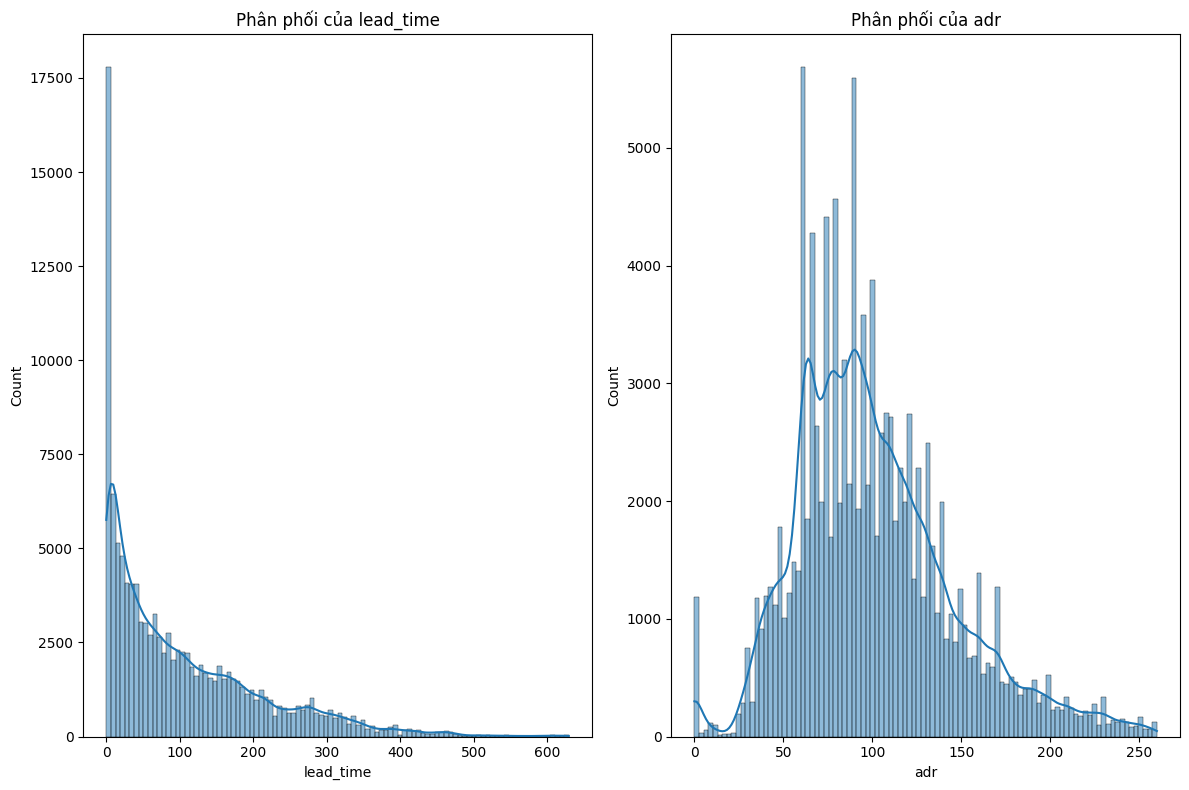

In [16]:
# Phân phối của biến định lượng liên tục
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes_flat = axes.flatten()
for i, col in enumerate(continuous_col):
    sns.histplot(df[col], ax=axes[i], bins=100, kde=True)
    axes[i].set_title(f"Phân phối của {col}")
plt.tight_layout()
plt.show()

* Nhận xét:
    - Lead_time có phân phối lệch phải rõ rệt tập trung nhiều ở thời gian đặt trước từ 0 đến 100 ngày. Trong khi adr có phân phối gần chuẩn cho thấy giá trung bình ổn định hơn.

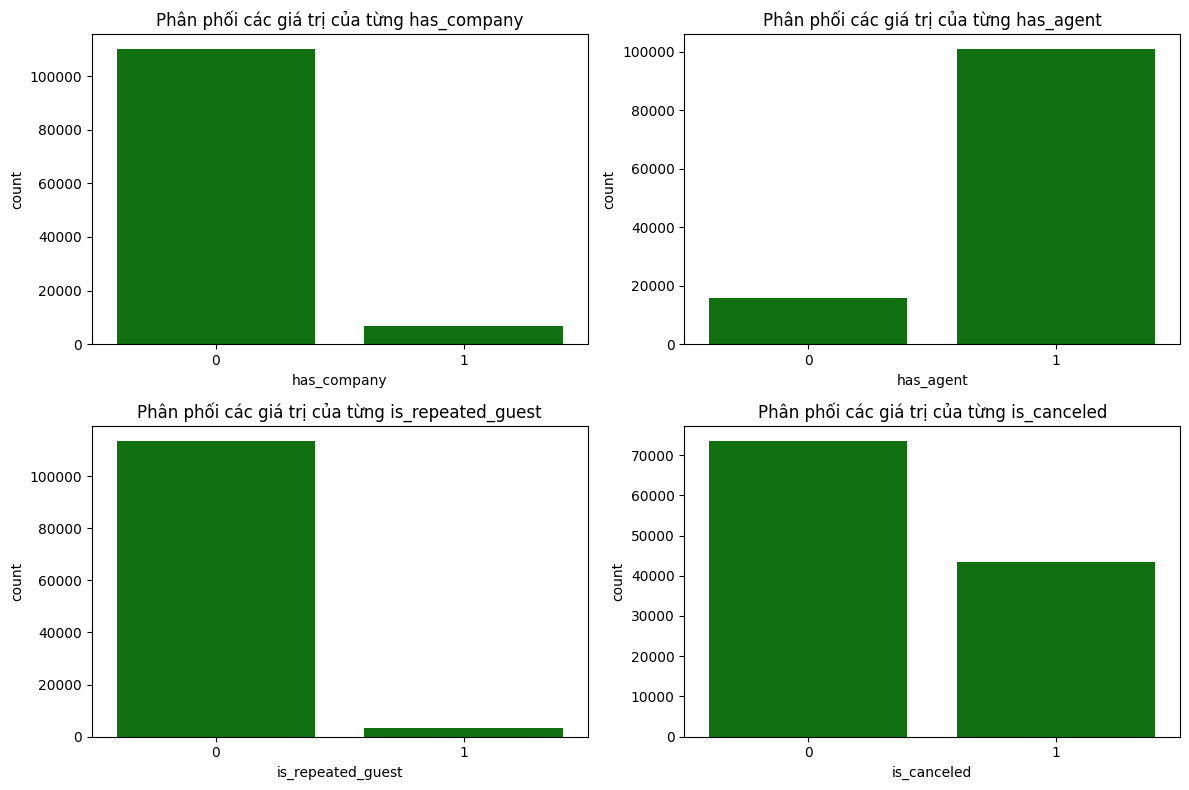

In [17]:
# Biến nhị phân
fig, axes = plt.subplots(2,2,figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(binary_col + target_col):
    sns.countplot(df, x=col, ax=axes[i], color="green")
    axes[i].set_title(f"Phân phối các giá trị của từng {col}")
plt.tight_layout()
plt.show()

* Nhận xét: Hầu như các biến nhị phân đều bị mất cân bằng giữa hai nhãn dữ liệu. has_company, is_canceled, is_repeated_guest tập trung ở nhãn 0 trong khi has_agent tập trung nhiều ở nhãn 1.

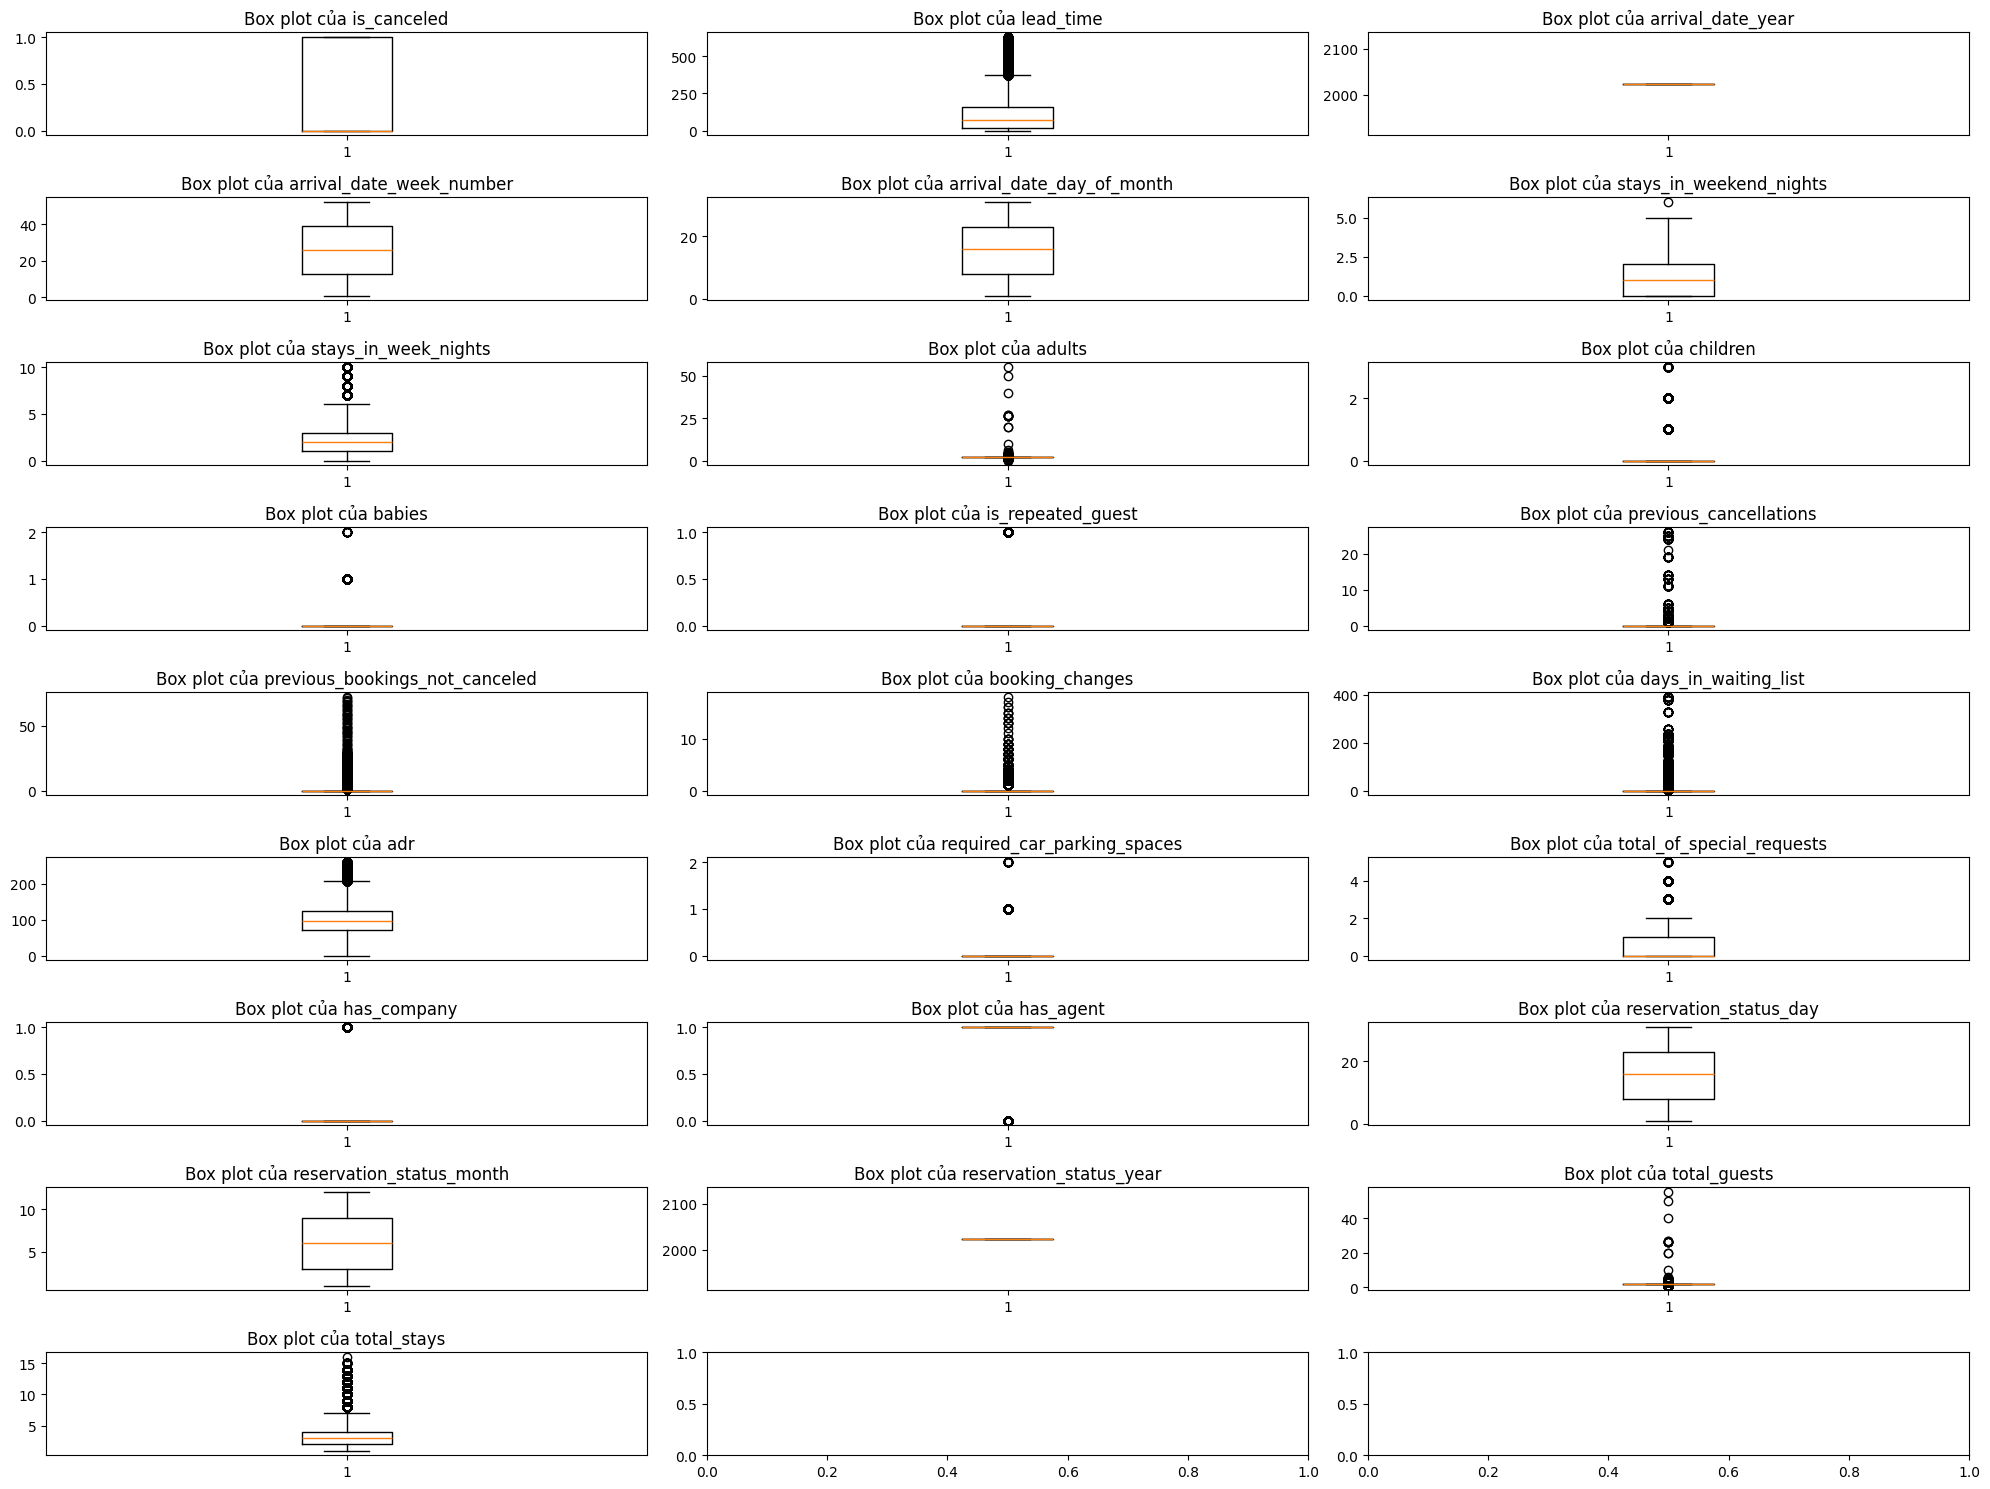

In [18]:
fig, axes = plt.subplots(9,3,figsize=(20, 15))
axes_flat = axes.flatten()
for i, col in enumerate(numerical_cols):
    df_dropna = df[col].dropna()
    axes_flat[i].boxplot(df_dropna)
    axes_flat[i].set_title(f"Box plot của {col}")
plt.tight_layout()
plt.show()

* Nhận xét cụ thể:
    - Cột is_cancel là biến nhị phân (biến mục tiêu) cho thấy dữ liệu đang mất cân bằng (số lượng booking không hủy nhiều hơn số lượng hủy).
    - Cột lead-time là biến định lượng liên tục thì phân phối khá lệch phải cho thấy đa số khách thường đặt sát ngày đến nhận phòng. Ngoài ra còn có một số ít khách đặt rất sớm (gần 2 năm --> có thể là outlier)--> đây là nhóm có hành vi khác biệt.
    - arrival_date_year là năm khách đến nhận phòng, trong bộ dữ liệu chỉ xuyên suốt năm 2024 --> thuộc tính này không có độ biến thiên theo nhiều năm --> có thể loại thuộc tính này vì khó khai thác cho xu hướng dài hạn.
    - arrival_date_week_number là biến định lượng rời rạc, biến này phân phối khá đều theo số tuần trong năm, không xuất hiện tuần cao điểm hay thấp điểm rõ rệt --> thời điểm nhận phòng không tập trung mạnh vào giai đoạn cụ thể.
    - arrival_date_day_of_month và reservation_status_day là các biến rời rạc theo thời gian, có giá trị trải đều --> yếu tố ngày không có điểm khác thường rõ rệt. Ngoài ra reservation_status_day là ngày cập nhật trạng thái đặt phòng nên sẽ làm rò rỉ dữ liệu --> Khi sử dụng để dự đoán thì sẽ bị loại bỏ.
    - stays_in_weekend_nights và stays_in_week_nights là các biến rời rạc có phân phối lệch phải --> cho thấy đa số lưu trú ngắn (0->2 đêm cuối tuần và 1->5 đêm ngày thường). Tuy nhiên có một số outlier ở ngày trong tuần cao khoảng 10 đếm --> có thể phân thành nhóm ở dài ngày thì thường có kế hoạch trước dẫn đến ít hủy phòng hơn. Ngoài ra, total_stays là biến tạo ra từ tổng của số đêm cuối tuần và trong tuần cũng có phân phối khá lệch phải, cho thấy đa số khách lưu trú ngắn ngày tầm từ 1 đến 5 đêm. Tuy nhiên vẫn có trường hợp khách ở dài ngày (8->15 đêm) --> Thời gian khách lưu trú cũng ảnh hưởng đến tỷ lệ đặt hay hủy phòng vì dài ngày có thể đã có kế hoạch trước đó thì tỷ lệ hủy sẽ giảm.
    - adults, children, babies là các biến rời rạc về số lượng người đặt khách sạn. Đa số booking chủ yếu là từ 1->2 người lớn và không kèm trẻ em hay em bé. total_guests là biến định lượng tính bởi tổng số lượng adults, children, babies có giá trị tập trung đa số ở 1 đến 2 khách. Tuy nhiên biến này có rất nhiều giá trị ngoại lai bất thường (hơn 50 khách) ở biến adults. Giá trị trên 50 người có thể do đi nhóm đông --> đã lên kế hoạch trước thì sẽ ít hủy hơn --> biến này cũng có ảnh hưởng đến biến mục tiêu.

    - previous_cancellations và previous_bookings_not_canceled là biến định lượng rời rạc, số lần hủy/ đặt phòng trước đó đa số là 0 vì phần lớn là khách mới. Tuy nhiên vẫn xuất hiện các giá trị ngoại lai lớn cho thấy có một nhóm đặt/ hủy nhiều.
    - booking_changes là biến định lượng rời rạc, cho thấy số lần thay đổi thông tin ít thường là 0 hoặc 1. Nhưng xuất hiện outlier cao khoảng 18 lần --> đây là hành vi khác thường hoặc dữ liệu lỗi.
    - days_in_waiting_list là biến rời rạc, đa số có giá trị bằng 0 nhưng có outlier rất lớn. Trong thực tế thời gian chờ xác nhận càng kéo dài thì tỷ lệ hủy càng cao.
    - adr là biến định lượng liên tục có phân phối gần chuẩn cho thấy giá trung bình không chêch lệch quá nhiều.
    - required_car_parking_spaces là biến định lượng rời rạc có giá trị chủ yếu là 0 cho thấy có rất ít yêu cầu chỗ để xe --> Hầu hết khách đặt phòng không cần chỗ để xe. số ít khách cần chủ yếu 1 đến 2 chỗ nhưng những khách yêu cầu chỗ đậu xe ít hủy hơn.
    - total_of_special_requests là biến định lượng rời rạc có phân phối giảm dần (không có yêu cầu chiếm đa số, số lượng yêu cầu càng nhiều càng ít lượng booking). --> càng nhiều yêu cầu khách càng có xu hướng ít hủy hơn (có thể do đã tương tác và tìm hiểu kỹ trước).
    - has_company là biến định lượng nhị phân cho biết khách đi công tác hoặc booking theo hợp đồng doanh nghiệp thì mới có mã công ty. Dựa vào biểu đồ thì số lượng khách theo 2 trường hợp trên rất ít và thực tế khách theo 2 trường hợp trên thường đã có kế hoạch trước và tỷ lệ hủy sẽ thấp hơn.
    - has_agent là biến định lượng nhị phân cho biết khách có đặt qua đại lý không. Dựa vào biểu đồ, số lượng khách đặt qua đại lý chiếm đa số, rất ít khách đặt trực tiếp khách sạn. Thông thường qua đại lý sẽ dễ hủy hơn tại có các chính sách của đại lý ưu đãi cho khách --> có ảnh hưởng đến biến mục tiêu.

#### kiểm định các biến định lượng

* Biến adr có phân phối gần chuẩn --> dùng t_test để so sánh giá trung bình giữa hai nhóm.
    - Giải thuyết:
        - H0: không có sự khác biệt về trung bình giữa hai nhóm hủy và không hủy.
        - H1: có sự khác biệt về trung bình giữa hai nhóm.
    - Với mức ý nghĩa alpha=0.05.
        - p<=0.05: bác bỏ H0 --> biến có ảnh hưởng đến biến mục tiêu.
        - p>0.05: không đủ bằng chứng bác bỏ H0.

In [19]:
adr_0 = df[df["is_canceled"] == 0]["adr"]
adr_1 = df[df["is_canceled"] == 1]["adr"]
t_stat, p_value = stats.ttest_ind(adr_0, adr_1)
print("t-stat= ", t_stat)
print("p_value= ", p_value)

t-stat=  -15.366560969980906
p_value=  3.093203453118856e-53


* Nhận xét:
    - Dựa vào kết quả thống kê t-test, cho thấy có sự khác biệt về giá trung bình giữa hai nhóm hủy hoặc không hủy là có ý nghĩa thống kê, không ngẫu nhiên (p-value rất nhỏ). Bên cạnh đó giá trị thống kê t-stat âm cho thấy gai trung bình của nhóm bị hủy cao hơn nhóm không hủy --> mức giá trung bình 1 ngày của 1 phòng có mối quan hệ với việc hủy phòng, nếu adr cao thì có xu hướng hủy phòng nhiều hơn.

#### Kiểm định các biến nhị phân thì dùng kiểm định Chi-Square để kiểm tra mối liên hệ giữa các biến đó với biến is_canceled.
- Giả thuyết:
        - H0: biến độc lập với is_canceled
        - H1: biến có mối liên hệ với is_canceled
    - Với mức ý nghĩa alpha=0.05.
        - p<=0.05: bác bỏ H0 --> có mối liên hệ không phải ngẫu nhiên.
        - p>0.05: không đủ bằng chứng bác bỏ H0.
- Cramers v là độ đo cho biết mối liên hệ mạnh yếu đối với biến mục tiêu theo ngưỡng. Các ngưỡng của cramers_v sử dụng chủ yếu để so sánh tươngđối mức độ ảnh hưởng giữa các biến.
    - Nếu cramers_v<=0.1 --> mức độ liên hệ với biến mục tiêu rất yếu.
    - Nếu 0.1<cramers_v<=0.3 --> mức độ liên hệ với biến mục tiêu ở mức trung bình.
    - Nếu 0.3<cramers_v<=0.5 --> mức độ liên hệ với biến mục tiêu ở mức mạnh.
    - Nếu cramers_v >=0.5 --> mức độ liên hệ rất mạnh.

In [20]:
for col in binary_col:
    table = pd.crosstab(df[col], df["is_canceled"])
    chi2, p_value, dof, ex = chi2_contingency(table)
    n = table.sum().sum()
    k = min(table.shape)
    cramers_v = np.sqrt(chi2/(n*(k-1)))
    print(f"Chi-Square cho {col}: ")
    print("Chi2= ",chi2)
    print("p_value= ", p_value)
    print("cramers_v= ", cramers_v)

Chi-Square cho has_company: 
Chi2=  1173.266454435961
p_value=  3.938210083089222e-257
cramers_v=  0.10013222047715191
Chi-Square cho has_agent: 
Chi2=  1181.5939340653504
p_value=  6.102059701215251e-259
cramers_v=  0.1004869458043302
Chi-Square cho is_repeated_guest: 
Chi2=  706.6423415193318
p_value=  1.0747142396618512e-155
cramers_v=  0.07770972075656629


* Nhận xét dựa trên kết quả kiểm định Chi-Square với các biến nhị phân:
    - has_company, has_agent và is_repeated_guest đều có giá trị chi2 rất lớn và p-value rất nhỏ (<<0.05) cho thấy các biến này có sự khác biệt rõ rệt giữa 2 nhóm hủy và không hủy là có ý nghĩa thông kê, không phải ngẫu nhiên.
        - has_company là khách hàng có mã công ty phản ánh khách đặt theo công ty hay doanh nghiệp hay không cũng ảnh hưởng tương đối ở mức trung bình đến quyết định hủy phòng khách sạn (cramers_v>0.1) --> Thường khách theo diện này có kế hoạch rõ ràng trước nên tỷ lệ hủy phòng sẽ có xu hướng ít hơn.
        - has_agent là khách đặt theo đại lý, thông qua kênh trung gian. Theo thực tế thì khi đặt qua các đại lý thì sẽ nhận được những chính sách về việc hủy phòng tốt hơn đặt trực tiếp (ví dụ hỗ trợ hủy không mất phí). Điều này sẽ ảnh hưởng ở mức trung bình tới số lượng hủy phòng của khách sạn, qua đại lý thì tỷ lệ hủy nhiều hơn (cramers_v>0.1).
        - is_repeated_guest là biến cho biết có phải khách cũ hay khách mới. Biến này cũng ảnh hưởng yếu đến tỷ lệ hủy phòng (cramers_v = 0.08). Điều này cho thấy yếu tố khách cũ hay mới không là yếu tố quyết định chính tới tỷ lệ hủy phòng.

* Các biến còn lại bao gồm các biến rời rạc và biến liên tục sẽ dùng kiểm định Mann-Whitney U test để kiểm tra các biến có độ ảnh hưởng đến biến is_canceled như thế nào.
    - Giả thuyết :
        - H0: phân phối của biến giống nhau giữa hai nhóm hủy hoặc không hủy.
        - H1: phân phối của biến khác nhau giữa hai nhóm
    - Với mức ý nghĩa alpha=0.05.
        - p<=0.05: bác bỏ H0 --> biến có ảnh hưởng đến biến mục tiêu.
        - p>0.05: không đủ bằng chứng bác bỏ H0.

In [21]:
mann_col = [col for col in numerical_cols if col not in binary_col and col not in target_col and col != "adr"]
mann_col

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_day',
 'reservation_status_month',
 'reservation_status_year',
 'total_guests',
 'total_stays']

In [22]:
for col in mann_col:
    canceled = df[df["is_canceled"] == 1][col].dropna()
    not_canceled = df[df["is_canceled"] == 0][col].dropna()
    u_stat, p_value = mannwhitneyu(canceled, not_canceled)
    print(f"Mann-Whitney U test cho {col}:")
    print("u_stat=", u_stat)
    print("p_value= ", p_value)

Mann-Whitney U test cho lead_time:
u_stat= 2204211431.5
p_value=  0.0
Mann-Whitney U test cho arrival_date_year:
u_stat= 1599459533.0
p_value=  1.0
Mann-Whitney U test cho arrival_date_week_number:
u_stat= 1600235365.5
p_value=  0.8895017285458113
Mann-Whitney U test cho arrival_date_day_of_month:
u_stat= 1592221764.5
p_value=  0.19477676636278052
Mann-Whitney U test cho stays_in_weekend_nights:
u_stat= 1577980001.0
p_value=  4.0697866375382365e-05
Mann-Whitney U test cho stays_in_week_nights:
u_stat= 1659960233.0
p_value=  1.1910438017839607e-28
Mann-Whitney U test cho adults:
u_stat= 1696419004.5
p_value=  2.0168111932418378e-118
Mann-Whitney U test cho children:
u_stat= 1594424569.0
p_value=  0.03658625664853199
Mann-Whitney U test cho babies:
u_stat= 1589696877.0
p_value=  2.1620891683752145e-31
Mann-Whitney U test cho previous_cancellations:
u_stat= 1805063765.0
p_value=  0.0
Mann-Whitney U test cho previous_bookings_not_canceled:
u_stat= 1533673148.5
p_value=  0.0
Mann-Whitney U 

* Nhận xét: dựa trên kết quả kiểm định cho thấy hầu hết các biến đều có sự khác biệt giữa hai nhóm hủy và không hủy là không ngẫu nhiên.
    - lead_time, stays_in_weekend_nights, stays_in_week_nights, total_stays có p-value<0.05 --> có sự khác biệt về phân phối nhóm thời gian lưu trú giữa hai nhóm hủy phòng và không hủy phòng và sự khác biệt này có ý nghĩa thống kê không ngẫu nhiên. --> Khách đặt phòng càng sớm, có thời gian lưu trú ngắn ngày thì dễ thay đổi lịch trình kế hoạch hơn nên khả năng hủy sẽ cao hơn. Các biến này phản ánh mức độ liên quan đến booking có bị hủy hay không.
    - adults, babies, total_guest có p-value rất nhỏ (<<0.05) cho thấy phân phối số lượng khách giữa hai nhóm không hủy và hủy là khác biệt và không ngẫu nhiên. Ngoài ra biến children có p-value gần ngưỡng 0.05 hơn so với 3 biến còn lại cho thấy mức đô khác biệt của biến này yếu hơn so với các biến còn lại khi xét ảnh hưởng đến biến mục tiêu --> Các booking có số lượng khách lớn có thể đặt theo nhóm/ đoàn thì sẽ có kế hoạch chuẩn bị trước ít có xu hướng hủy hơn. Nếu chỉ có 1 hoặc 2 khách thì linh hoạt dễ đổi ý hơn. Biến này cũng có mối liên hệ với biến mục tiêu.
    -  previous_cancellations, previous_bookings_not_canceled, booking_changes, days_in_waiting_list cũng có p-value thấp cho thấy nhóm hành vi tương tác thay đổi booking cũng là nhóm có mối liên hệ đến việc hủy phòng không ngẫu nhiên.
    - Nhóm yêu cầu từ khách hàng (required_car_parking_spaces và total_of_special_requests) cũng có p-value=0 (<0.05) cho thấy có sự khác biệt về yêu cầu của khách giữa hai nhóm và sự khác biệt này có ý nghĩa. Kết hợp với biểu đồ đã phân tích, số lượng yêu cầu càng nhỏ có mức độ liên quan đến quyết định hủy phòng (nhiều yêu cầu thì hủy ít hơn).
    - Các biến thời gian (arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, reservation_status_day, reservation_status_month, reservation_status_year) có giá trị p-value>0.05 cho thấy chưa có đủ bằng chứng cho sự khác biệt giữa hai nhóm hủy hay không hủy có ý nghĩa thống kê. Điều này cho thấy quyết định hủy phòng chưa có mối liên hệ rõ ràng vào các biến thời gian. Dựa vào biểu đồ đã phân tích ở trên, các biến thời gian tập trung chủ yếu trong 1 năm không biến thiên, khá đều trong phạm vi các giá trị --> có thể loại bỏ.
- Kết luận: qua kiểm định cho thấy quyết định hủy phòng chưa có mối liên hệ rõ ràng với các yếu tố thời gian như các yếu tố còn lai.

## Biến định tính

In [23]:
df[categorical_cols]

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,city,hotel_type,previous_cancellations_group,previous_bookings_not_canceled_group,booking_changes_group,days_in_waiting_list_group
0,September,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2024-09-10 03:46:25.734029096,Delhi,Resort,0,0,0,no_wait
1,August,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2024-08-14 18:07:10.049669568,Kolkata,Resort,0,0,0,no_wait
2,September,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-09-14 14:27:32.473846000,Lucknow,Resort,0,0,0,no_wait
3,October,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-10-23 04:39:14.025915284,Delhi,Resort,0,0,0,no_wait
4,January,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2024-01-07 03:46:27.905083382,Indore,Resort,0,0,0,no_wait
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117012,September,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-09-29 05:33:06.002060492,Pune,City,0,0,0,no_wait
117013,November,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2024-11-16 01:55:18.426320680,Mumbai,City,0,0,0,no_wait
117014,April,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2024-04-19 07:50:22.982016768,Lucknow,City,0,0,0,no_wait
117015,October,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-10-05 12:37:40.429352788,Ahmedabad,City,0,0,0,no_wait


In [24]:
categorical_nunique = [col for col in categorical_cols if df[col].nunique() <= 15]

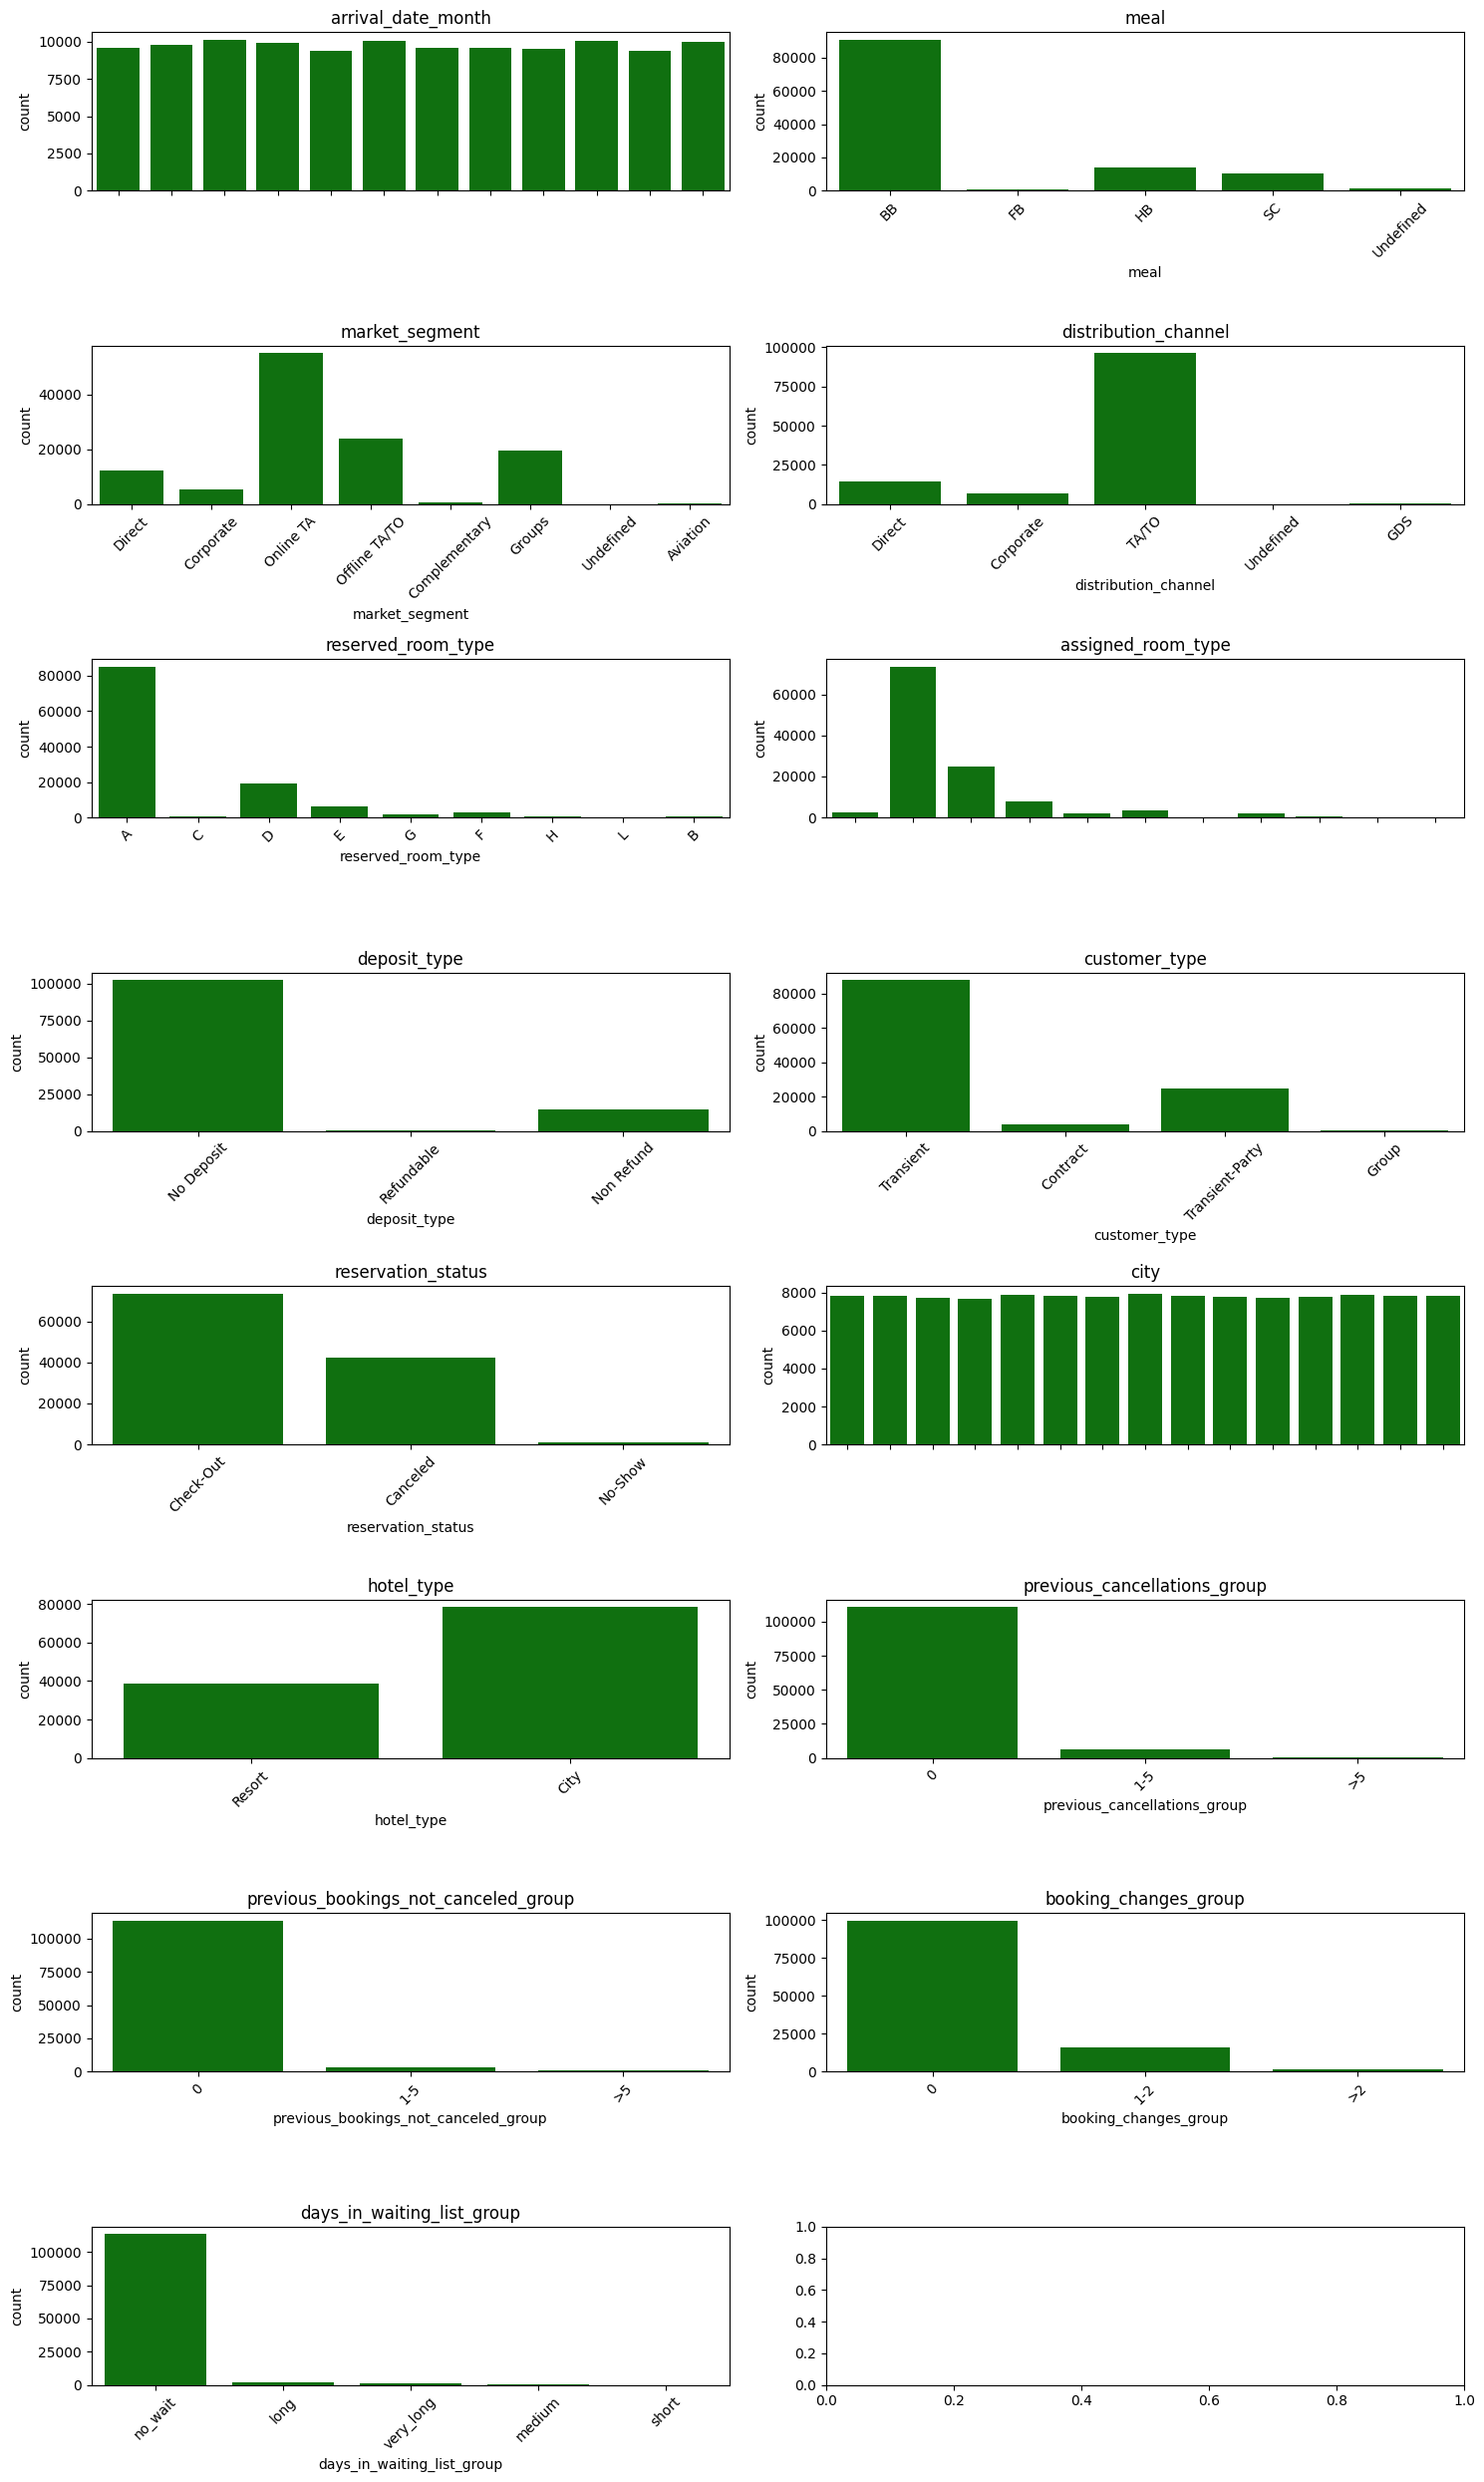

In [25]:
fig, axes = plt.subplots(8, 2, figsize=(15,25))
axes = axes.flatten()
for i, col in enumerate(categorical_nunique):
    sns.countplot(df, x=col, ax=axes[i], color="green")
    axes[i].set_title(f"{col}")
    if df[col].nunique() > 10:
        axes[i].set_xticklabels([])
        axes[i].set_xlabel("")
    else:
        axes[i].tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

- Kiểm định chi-squared kết hợp cramers giữa 2 biến định tính.
    - Giả thuyết:
        - H0: biến độc lập với is_canceled
        - H1: biến có mối liên hệ với is_canceled
    - Với mức ý nghĩa alpha=0.05.
        - p<=0.05: bác bỏ H0 --> có mối liên hệ không phải ngẫu nhiên.
        - p>0.05: không đủ bằng chứng bác bỏ H0.
- Cramers v là độ đo cho biết mối liên hệ mạnh yếu đối với biến mục tiêu theo ngưỡng. Các ngưỡng của cramers_v sử dụng chủ yếu để so sánh tươngđối mức độ ảnh hưởng giữa các biến.
    - Nếu cramers_v<=0.1 --> mức độ liên hệ với biến mục tiêu rất yếu.
    - Nếu 0.1<cramers_v<=0.3 --> mức độ liên hệ với biến mục tiêu ở mức trung bình.
    - Nếu 0.3<cramers_v<=0.5 --> mức độ liên hệ với biến mục tiêu ở mức mạnh.
    - Nếu cramers_v >=0.5 --> mức độ liên hệ rất mạnh.

In [26]:
for col in categorical_cols:
    table = pd.crosstab(df[col], df["is_canceled"])
    chi2, p_value, dof, ex = chi2_contingency(table)
    n = table.sum().sum()
    k = min(table.shape)
    cramers_v = np.sqrt(chi2/(n*(k-1)))
    print(f"Chi-Square của {col}:")
    print("Chi2= ", chi2)
    print("p_value= ", p_value)
    print("cramers_v= ", cramers_v)

Chi-Square của arrival_date_month:
Chi2=  9.007514421369883
p_value=  0.6211986824363607
cramers_v=  0.00877360348902153
Chi-Square của meal:
Chi2=  316.1284206974198
p_value=  3.590526471753257e-67
cramers_v=  0.05197653104359938
Chi-Square của country:
Chi2=  15899.18110511431
p_value=  0.0
cramers_v=  0.368606422760115
Chi-Square của market_segment:
Chi2=  8402.2354779897
p_value=  0.0
cramers_v=  0.2679618358098276
Chi-Square của distribution_channel:
Chi2=  3647.220371360183
p_value=  0.0
cramers_v=  0.1765454472939504
Chi-Square của reserved_room_type:
Chi2=  627.8803073559594
p_value=  2.366299041523378e-130
cramers_v=  0.07325106633439499
Chi-Square của assigned_room_type:
Chi2=  4768.4307470524745
p_value=  0.0
cramers_v=  0.20186603831652536
Chi-Square của deposit_type:
Chi2=  27517.54472439629
p_value=  0.0
cramers_v=  0.48493146074461274
Chi-Square của customer_type:
Chi2=  2248.7157169283437
p_value=  0.0
cramers_v=  0.13862539535982976
Chi-Square của reservation_status:
C

* Nhận xét:
    - arrival_date_month, reservation_status_date, city có chi2 khá cao nhưng p-value>0.05 cho thấy mối liên hệ giữa các biến này với biến mục tiêu chưa có ý nghĩa thống kê, có thể do ngẫu nhiên. Các biến còn lại có p-value<0.05 chứng tỏ mối liên hệ với biến mục tiêu là có ý nghĩa thống kê.
    - deposit_type, previous_cancellations_group, country là các biến có mối liên hệ  mạnh với booking hủy. (có cramers_v lớn). Bên cạnh đó, các biến market_segment, assigned_room_type, distribution_channel, hotel_type, customer_type, previous_bookings_not_canceled_group, booking_changes_group,days_in_waiting_list_group là các biến có mối liên hệ tương đối ở mức trung bình với biến mục tiêu. Vì vậy các biến này sẽ được phân tích rõ và cân nhắc.
    - reserved_room_type và city có mối liên hệ rất yếu (cramer_v <0.1) với biến mục tiêu --> loại bỏ.
    - Mặc dù meal có mối liên hệ với biến mục tiêu nhưng cramer_v của meal rất nhỏ <0.1 --> rát ít giá trị dự báo --> loại bỏ.
    - Ngoài ra reservation_status_date có mối quan hệ với biến mục tiêu chỉ là ngẫu nhiên nhưng carmer_v rất lớn (0.799) cho thấy sự bất thường. Vì biến này là biến chứa thông tin trạng thái đặt phòng nên sẽ làm rò rỉ thông tin --> cần loại bỏ.

* Bên cạnh các biến có mối liên hệ mạnh với biến mục tiêu, các biến market_segment, assigned_room_type, distribution_channel, hotel_type, customer_type, previous_bookings_not_canceled_group, booking_changes_group,days_in_waiting_list_group mặc dù chỉ có mức độ tương đối nhưng vẫn được giữ lại để phân tích bổ sung.

##### Hotel_type

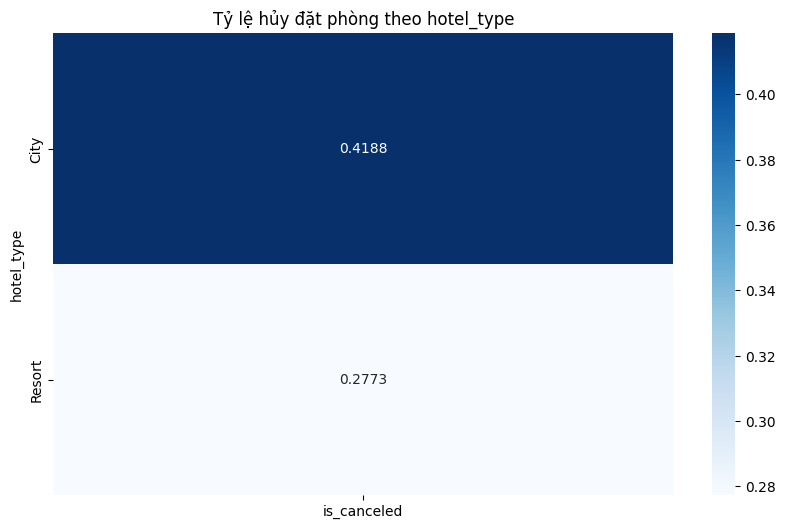

In [27]:
cancel_rate = df.pivot_table(index="hotel_type", values="is_canceled", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(cancel_rate, annot=True, cmap="Blues", fmt=".4f")
plt.title("Tỷ lệ hủy đặt phòng theo hotel_type")
plt.show()

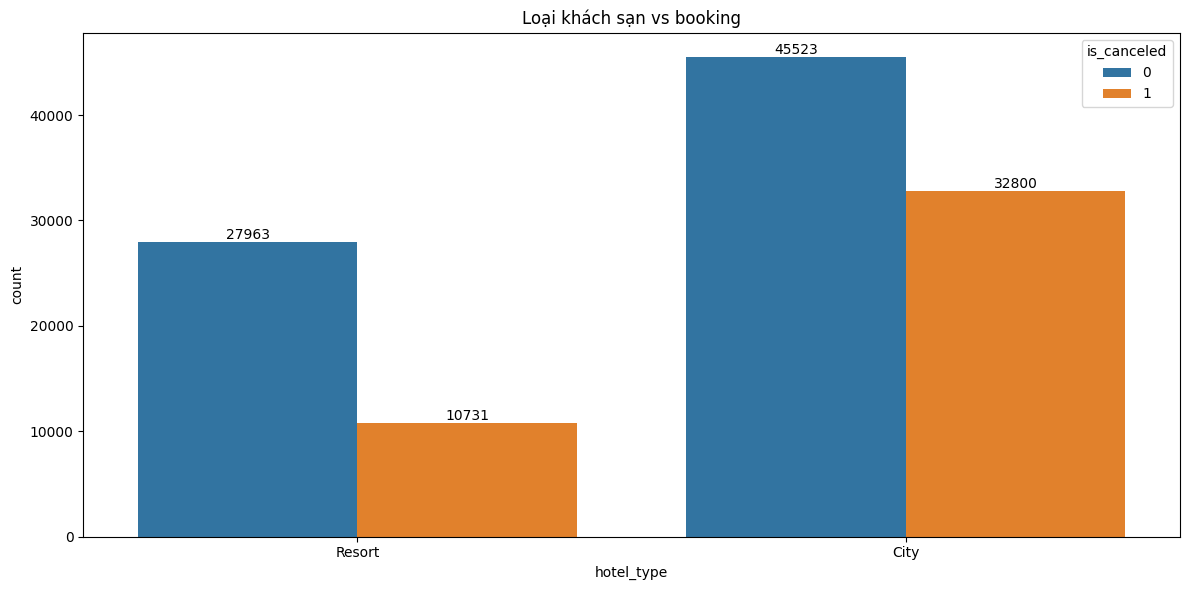

In [28]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="hotel_type", hue="is_canceled", data=df)
plt.title("Loại khách sạn vs booking")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

* Nhận xét: dựa vào biểu đồ cho thấy:
    - Số lượng đặt ở khách sạn resort chỉ bằng 1/3 số lượng khách sạn city nhưng tỷ lệ hủy ở resort ít hơn gần 1/2 so với city --> resort ko ưu chuộng nhưng tỷ lệ đặt phòng được đảm bảo. Có thể do nhiều yếu tố tác động như thời gian đặt trước và loại đặt cọc ảnh hưởng đến tỷ lệ hủy này.

#### customer_type

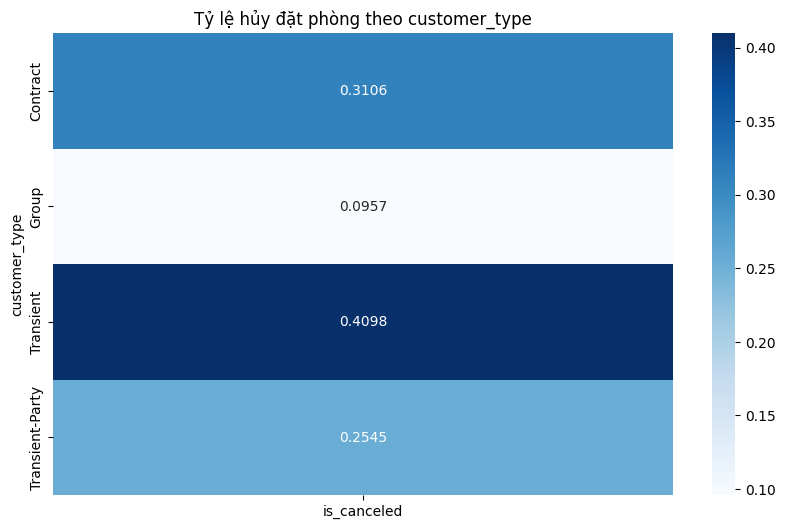

In [29]:
cancel_rate = df.pivot_table(index="customer_type", values="is_canceled", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(cancel_rate, annot=True, cmap="Blues", fmt=".4f")
plt.title("Tỷ lệ hủy đặt phòng theo customer_type")
plt.show()

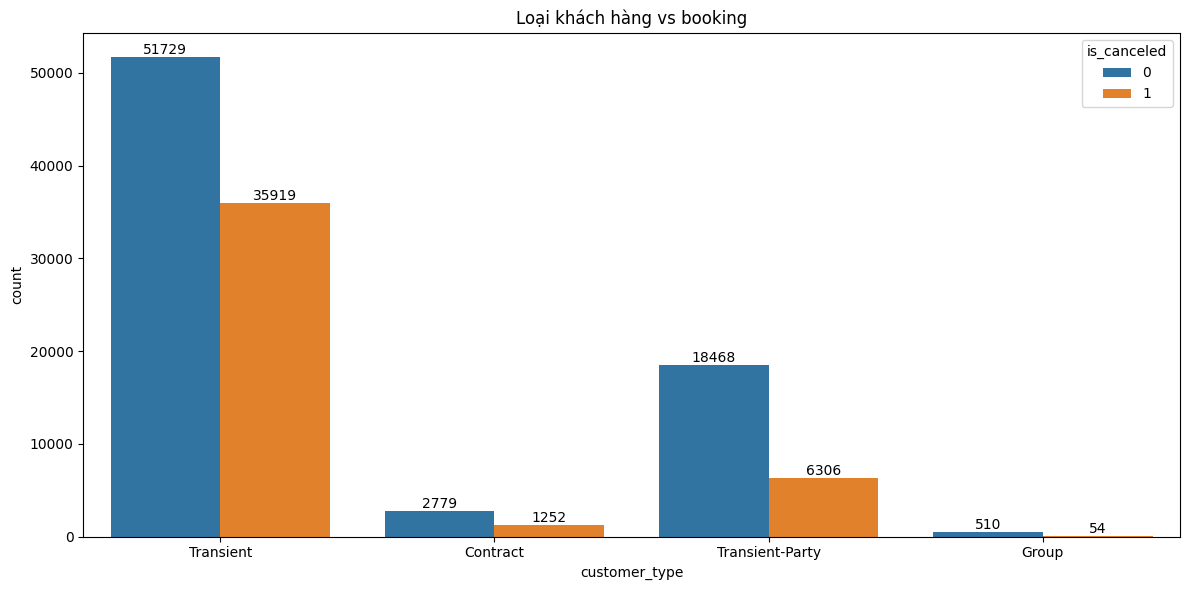

In [30]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="customer_type", hue="is_canceled", data=df)
plt.title("Loại khách hàng vs booking")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

* Nhận xét: dựa vào biểu đồ, cho thấy:
    - Khách lẻ chiếm đa số và có số lượng hủy nhiều nhất --> đây là nhóm rủi ro lớn.
    - Nhóm nhỏ và hợp đồng có tỷ lệ hủy vừa phải, còn khách đoàn hủy ít.
    - --> Khách lẻ là nhóm rủi ro cao nhất về hủy phòng, do vừa chiếm số lượng lớn vừa có số booking hủy cao.

#### previous_bookings_not_canceled_group

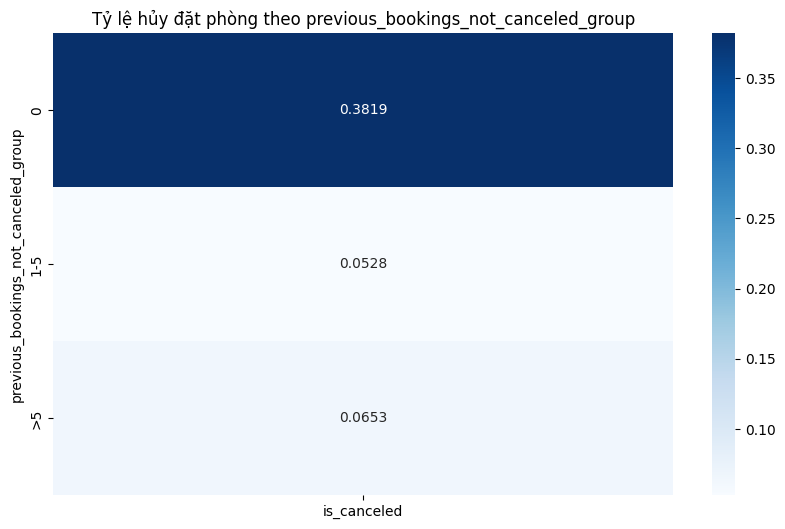

In [31]:
cancel_rate = df.pivot_table(index="previous_bookings_not_canceled_group", values="is_canceled", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(cancel_rate, annot=True, cmap="Blues", fmt=".4f")
plt.title("Tỷ lệ hủy đặt phòng theo previous_bookings_not_canceled_group")
plt.show()

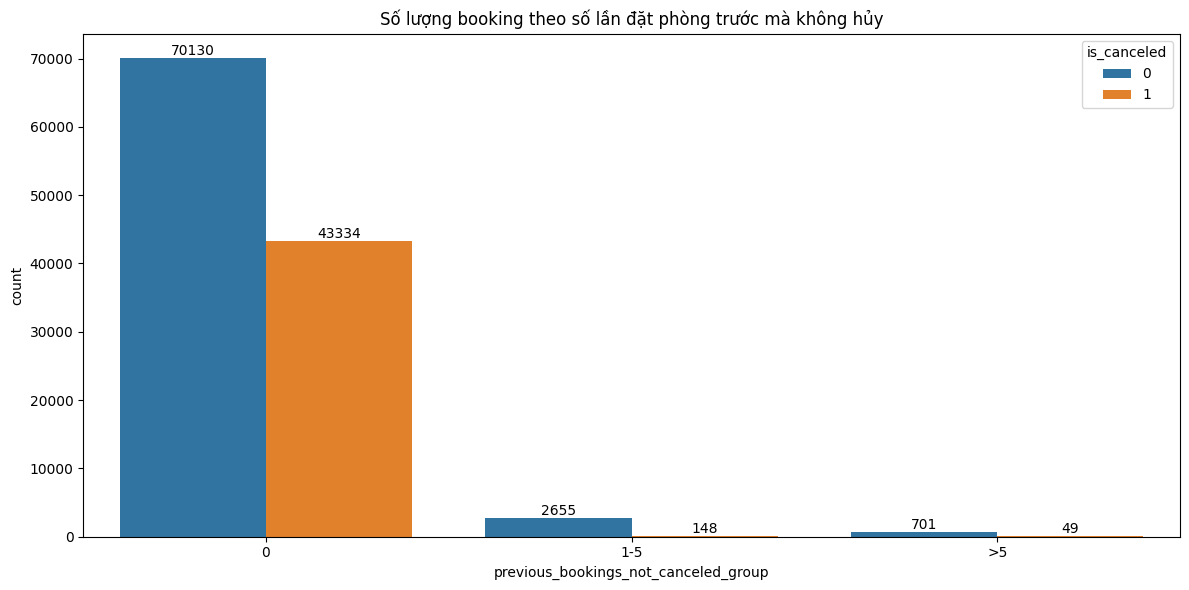

In [32]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="previous_bookings_not_canceled_group", hue="is_canceled", data=df)
plt.title("Số lượng booking theo số lần đặt phòng trước mà không hủy")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

* Nhận xét:
    - Hầu như đa số booking đều là của khách chưa từng đặt thành công trước đó. Tuy nhiên, ở nhóm không lần đặt thành công trước đó có số booking hủy rất cao, chênh lệch giữ hủy và không hủy không quá lớn --> đây là nhóm rủi ro hủy phòng cao nhất.
    - Nhóm 1-5 lần booking thành công trước đó có số booking không hủy chiếm áp đảo booking hủy --> khách đã từng đặt phòng có xu hướng ổn định hơn, ít hủy phòng hơn.
    - nhóm trên 5 lần booking thành công chỉ chiếm số lượng nhỏ nhưng gần như toàn bộ booking không bị hủy.

    --> Booking thành công trước đó càng nhiều lần thì khả năng hủy booking càng giảm. Cần chú ý tới nhóm khách mới có rủi ro cao.

#### days_in_waiting_list_group

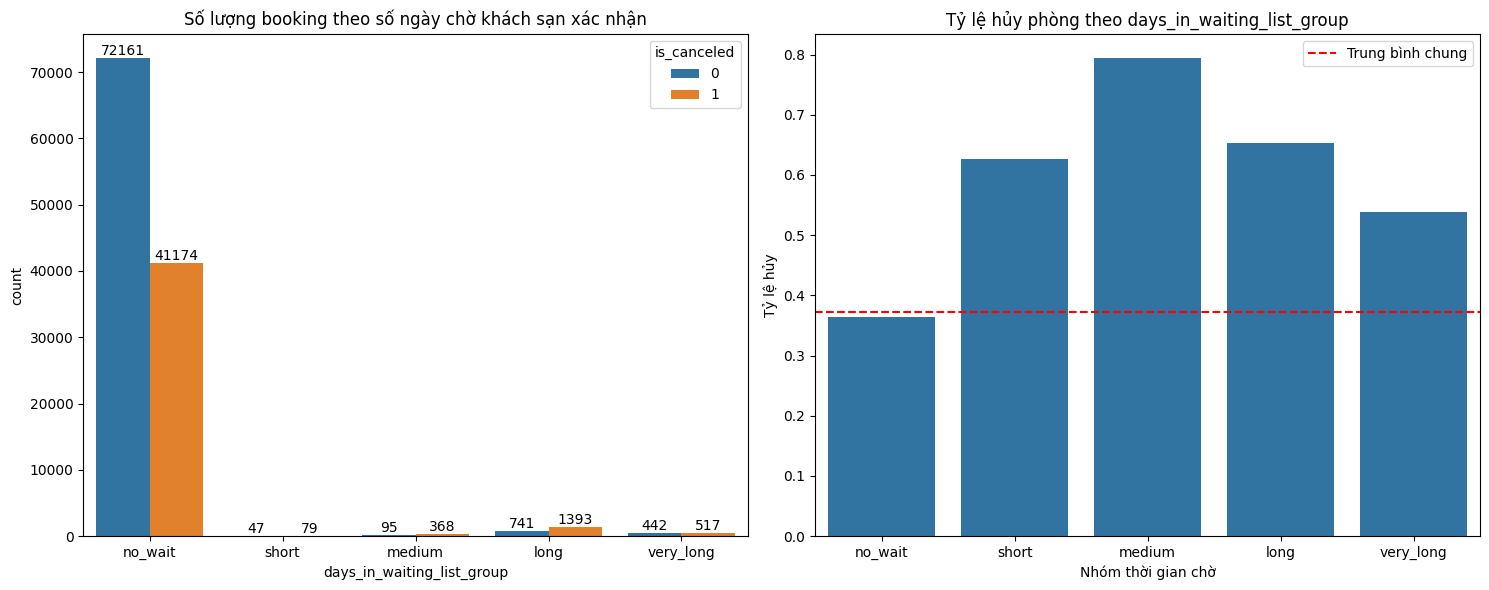

In [33]:
waiting_order = ['no_wait', 'short', 'medium', 'long', 'very_long']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x="days_in_waiting_list_group", hue="is_canceled", data=df, ax=axes[0], order=waiting_order)
axes[0].set_title("Số lượng booking theo số ngày chờ khách sạn xác nhận")
for container in axes[0].containers:
    axes[0].bar_label(container)

sns.barplot(
    data=df,
    x='days_in_waiting_list_group',
    y='is_canceled',
    order=waiting_order,
    errorbar=None,
    ax=axes[1]
)

axes[1].axhline(df['is_canceled'].mean(), color='red', linestyle='--', label='Trung bình chung')

axes[1].set_title('Tỷ lệ hủy phòng theo days_in_waiting_list_group')
axes[1].set_xlabel('Nhóm thời gian chờ')
axes[1].set_ylabel('Tỷ lệ hủy')
plt.legend()
plt.tight_layout()
plt.show()

* Nhận xét:
    - Nhóm khách hàng không cần chờ chiếm đa số booking.
    - Ngay khi khách phải chờ dù chỉ là nhóm short, tỷ lệ hủy đã vọt lên trên 60%. Đỉnh điểm ở nhóm medium ~ 80%. Nhìn chung nếu bị vào danh sách chờ thì tỉ lệ hủy phòng đều nguy hiểm ở mức trên 50%.

#### market_segment

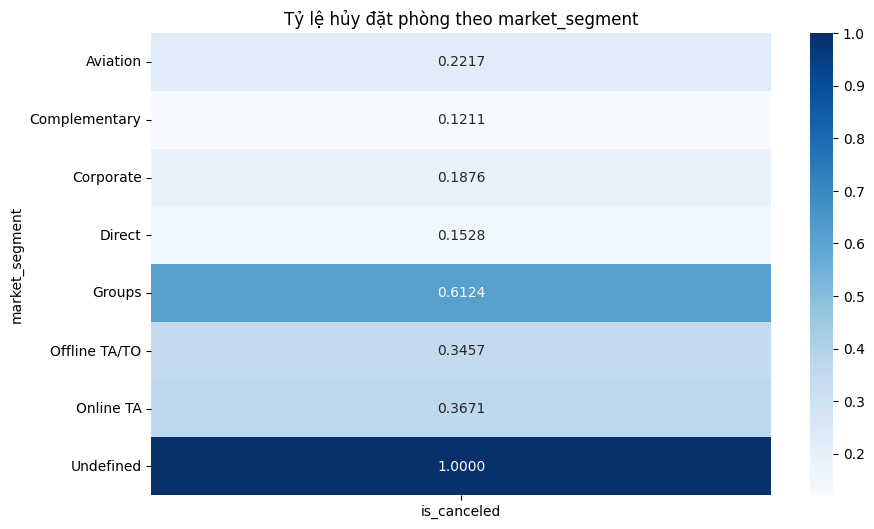

In [34]:
cancel_rate = df.pivot_table(index="market_segment", values="is_canceled", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(cancel_rate, annot=True, cmap="Blues", fmt=".4f")
plt.title("Tỷ lệ hủy đặt phòng theo market_segment")
plt.show()

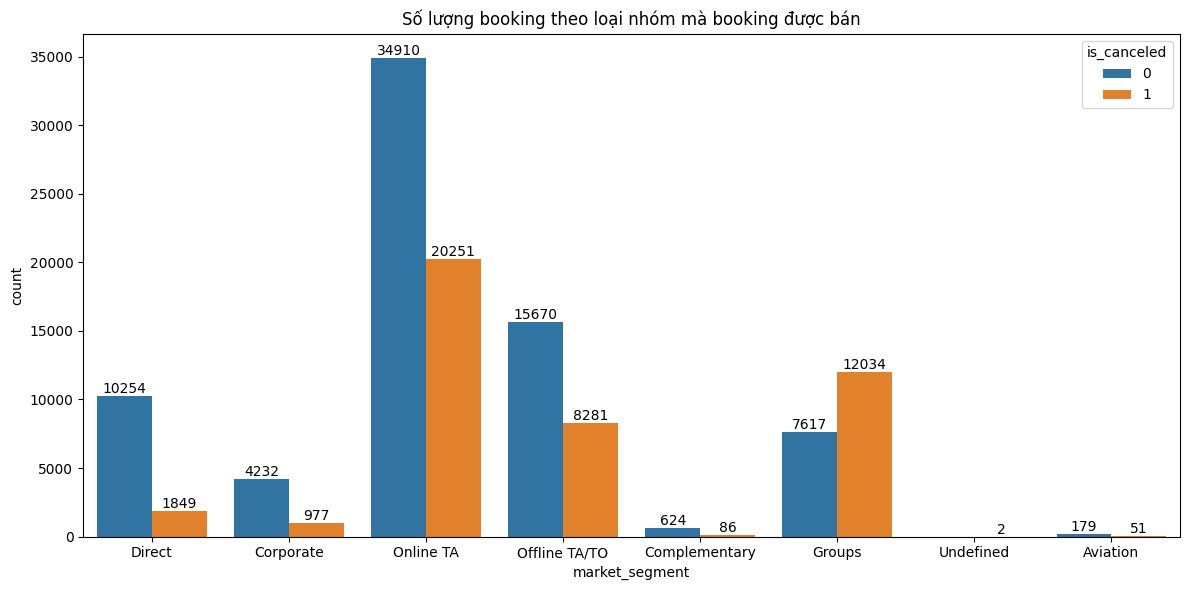

In [35]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="market_segment", hue="is_canceled", data=df)
plt.title("Số lượng booking theo loại nhóm mà booking được bán")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

* Nhận xét:
    - Nhóm khách hàng booking bằng đại lý trực tuyến (Online TA) chiếm đa số booking nhưng lại có rủi ro cao tỷ lệ hủy gần 40% so với không hủy. Khách booking qua đại lý trực tiếp (Offline TA/TO) có số lượng ít hơn trực tuyến nhưng có rủi ro tương đồng với đại lý trực tuyến.
    - Ngoài ra, ở khách theo đoàn (Group) có sự khác biệt với các nhóm còn lại. Nhóm này có số lượng hủy cao hơn số lượng không hủy (chiếm 61,24%) --> Cần chú ý nhóm khách hàng đặt theo đoàn.
    - Nhóm chưa xác định (Undefined) chỉ có 2 booking và cả 2 đều hủy cho thấy có thể 2 thông tin đặt phòng này lỗi --> có thể loại bỏ để tránh nhiễu.
    - ở các nhóm khách booking trực tiếp và theo doanh nghiệp có độ tin cậy cao (tỷ lệ hủy nhỏ hơn 20%).
    - Nhóm phòng bổ sung có tỷ lệ hủy thấp nhất --> có thể do khách hàng thường sẽ có xu hướng ít từ chối các dịch vụ bổ sung thêm.
    
    --> Các đoàn khách thường đặt phòng xong thay đổi quyết định dẫn đến hủy phòng nhiều --> Cần chú ý nhóm khách hàng booking này.

#### assigned_room_type

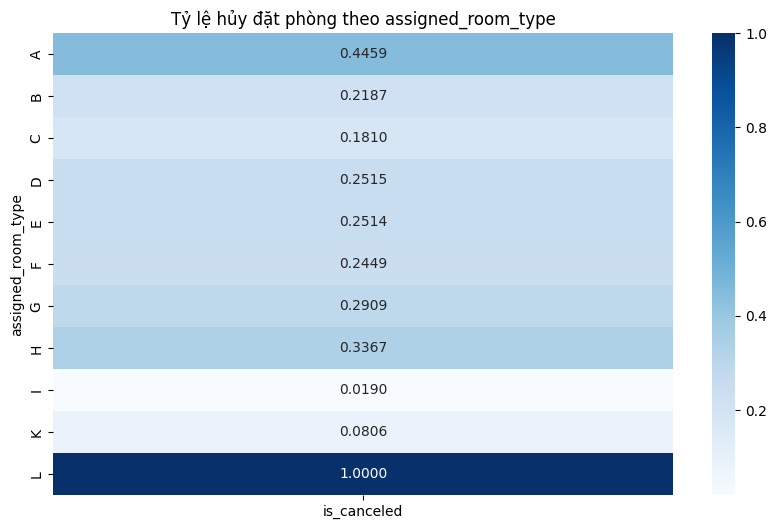

In [36]:
cancel_rate = df.pivot_table(index="assigned_room_type", values="is_canceled", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(cancel_rate, annot=True, cmap="Blues", fmt=".4f")
plt.title("Tỷ lệ hủy đặt phòng theo assigned_room_type")
plt.show()

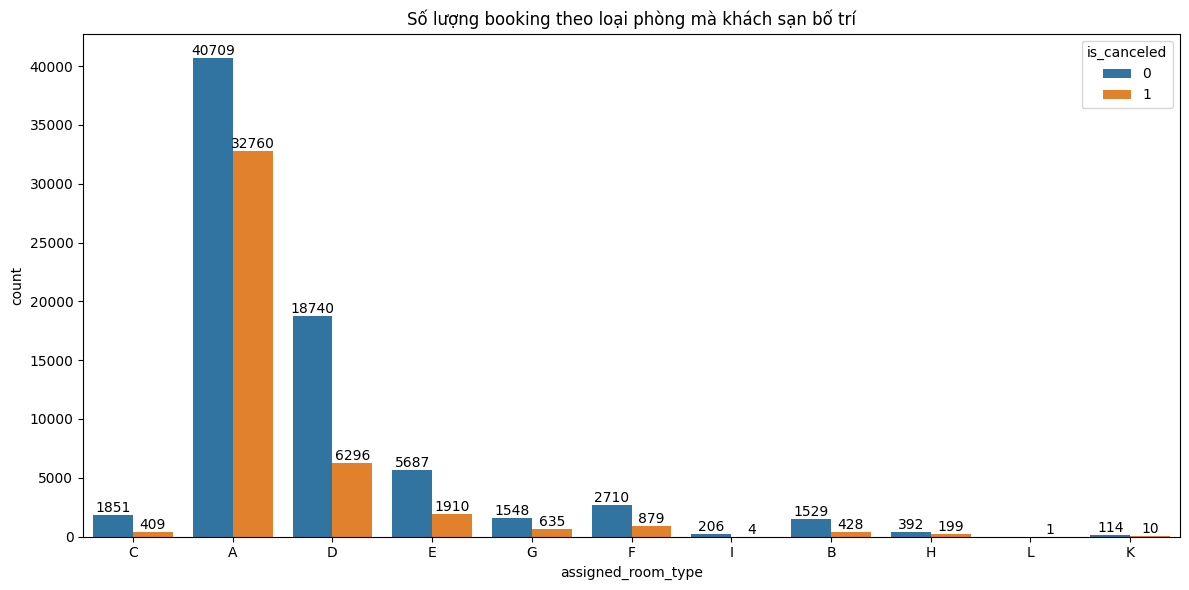

In [37]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="assigned_room_type", hue="is_canceled", data=df)
plt.title("Số lượng booking theo loại phòng mà khách sạn bố trí")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

* Nhận xét:
    - Hầu như các loại phòng được khách sạn bố trí đều có tỷ lệ hủy thấp hơn tỷ lệ không hủy. Tuy nhiên ở loại phòng L chỉ có 1 trường hợp và trường hợp này là hủy có thể do phòng được bổ sung tạm thời khi hết phòng --> khách không muốn nên hủy.
    - Loại phòng A có số lượng cao nhất nhưng có tỷ lệ hủy cũng gần 50%. Các loại phòng còn lại có số lượng nhưng rủi ro hủy phòng thấp.
    
    --> Khách sạn phân bố phòng trải dài qua các loại phòng và chủ yếu là loại phòng A và D. Tỷ lệ hủy dựa theo từng loại phòng không quá cao, chỉ chú ý đến loại A là có rủi ro cao nhất trong tất cả loại phòng.

#### distribution_channel

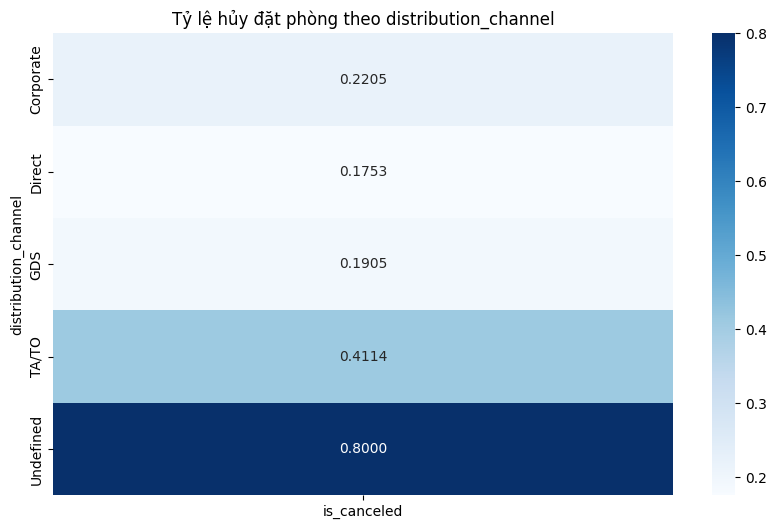

In [38]:
cancel_rate = df.pivot_table(index="distribution_channel", values="is_canceled", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(cancel_rate, annot=True, cmap="Blues", fmt=".4f")
plt.title("Tỷ lệ hủy đặt phòng theo distribution_channel")
plt.show()

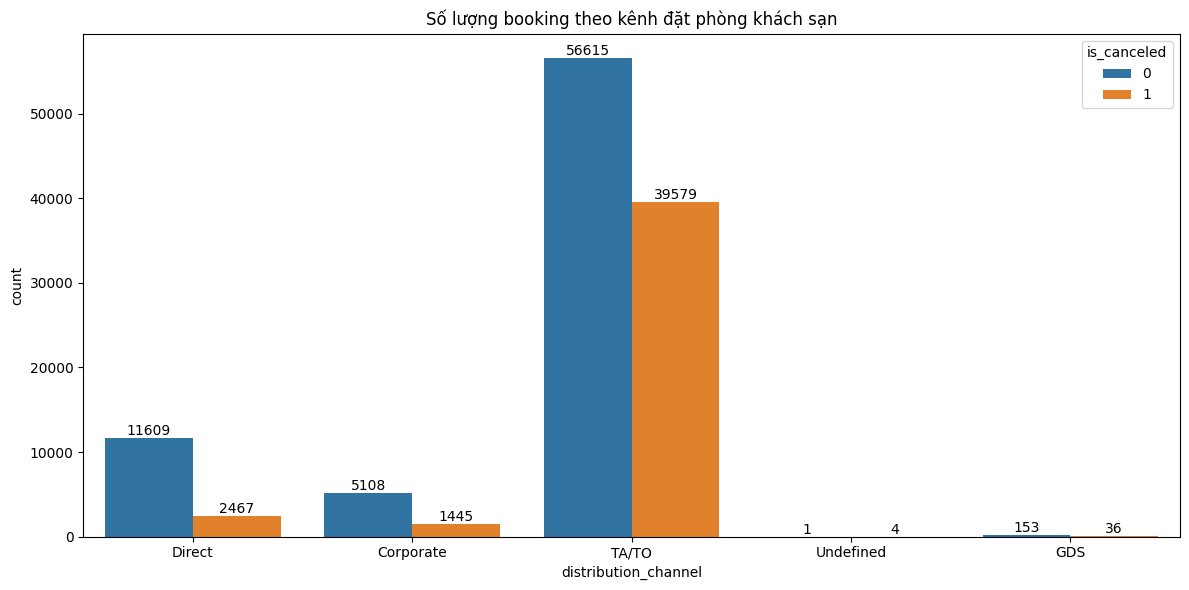

In [39]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="distribution_channel", hue="is_canceled", data=df)
plt.title("Số lượng booking theo kênh đặt phòng khách sạn")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

* Nhận xét:
    - Kênh đặt phòng có số lượng lớn nhất TA/TO cao nhất nhưng tỷ lệ hủy cũng cao khoảng 40% --> rủi ro cao nhất trong các kênh đặt còn lại.
    - Kênh chưa xác định chiếm số lượng rất nhỏ (5 booking) nhưng đa số là booking hủy vì kênh booking đến khách sạn chưa rõ nên có thể khách sạn tự hủy.
    
    --> Rủi ro hủy phòng theo kênh đặt không quá lớn, không có ảnh hưởng nhiều.

#### booking_changes_group

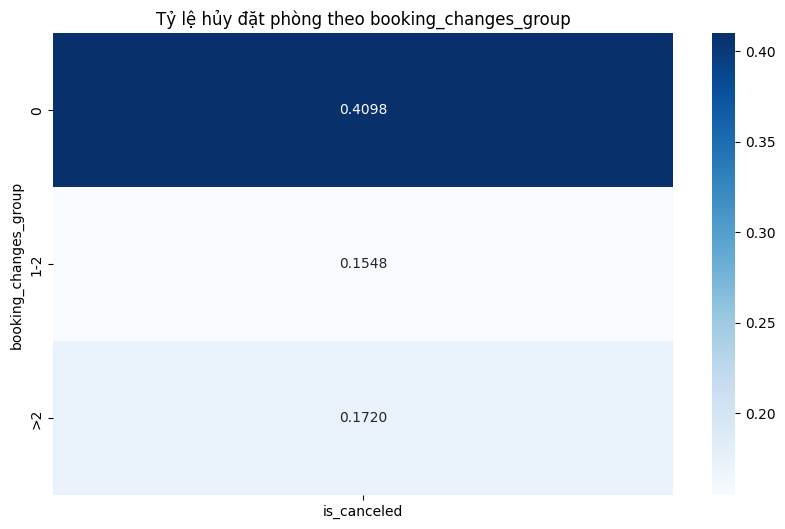

In [40]:
cancel_rate = df.pivot_table(index="booking_changes_group", values="is_canceled", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(cancel_rate, annot=True, cmap="Blues", fmt=".4f")
plt.title("Tỷ lệ hủy đặt phòng theo booking_changes_group")
plt.show()

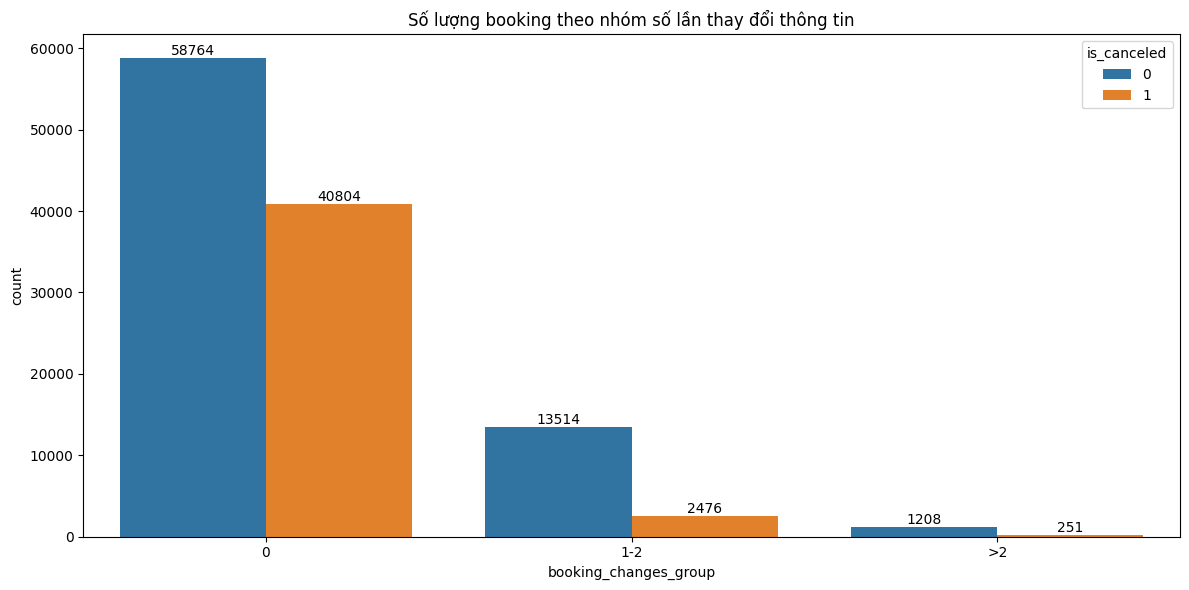

In [41]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="booking_changes_group", hue="is_canceled", data=df)
plt.title("Số lượng booking theo nhóm số lần thay đổi thông tin")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

* Nhận xét:
    - Số lần thay đổi thông tin từ khách hàng có tỷ lệ hủy ở mức thấp. Tuy nhiên khách không thay đổi thông tin có tỷ lệ hủy ở mức trung bình khoảng 40% có thể do số lượng booking tập trung nhiều ở nhóm khách này.
    
    --> Rủi ro hủy phòng dựa trên số lần thay đổi thông tin chưa rõ rệt, không ảnh hưởng nhiều.

# Phân tích đa biến

### Biến định lượng & định lượng (tương quan)

In [42]:
discrete_col = [col for col in discrete_col if col not in ["arrival_date_year", "reservation_status_year"]]


In [43]:
corr_col = discrete_col + continuous_col + target_col

* Vì là các biến rời rạc, biến mục tiêu (nhị phân), biến định lượng có phân phối lệch phải nên dùng tương quan Spearman để đánh giá mối quan hệ giữa các biến.

In [44]:
corr = df[corr_col].corr(method="spearman")
corr

,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status_day,reservation_status_month,total_guests,total_stays,lead_time,adr,is_canceled
arrival_date_week_number,1.000000,0.071536,-0.002423,-0.001947,0.001229,0.005498,0.004241,-0.001405,-0.003053,0.002798,0.005316,-0.004467,-0.002306,0.071536,0.982439,0.003854,-0.002743,0.003806,0.002323,0.000406
arrival_date_day_of_month,0.071536,1.000000,0.001008,0.001977,0.000352,0.000081,-0.002225,0.000073,0.000574,0.001999,-0.006110,-0.004368,0.007185,1.000000,0.002778,0.000499,0.001932,-0.001442,-0.000533,-0.003790
stays_in_weekend_nights,-0.002423,0.001008,1.000000,0.219823,0.129316,0.049941,0.023423,-0.055741,-0.084979,0.038013,-0.075688,-0.020021,0.080082,0.001008,-0.002891,0.136320,0.648583,0.156420,0.043027,-0.011996
stays_in_week_nights,-0.001947,0.001977,0.219823,1.000000,0.155149,0.050850,0.027392,-0.063985,-0.121428,0.062883,0.011606,-0.037154,0.076812,0.001977,-0.002331,0.158747,0.860829,0.290773,0.080176,0.032462
adults,0.001229,0.000352,0.129316,0.155149,1.000000,0.080702,0.027757,-0.037089,-0.214180,-0.084249,-0.037624,0.012684,0.165885,0.000352,0.000398,0.887967,0.198282,0.193809,0.271675,0.067634
children,0.005498,0.000081,0.049941,0.050850,0.080702,1.000000,0.038377,-0.056401,-0.033092,0.065143,-0.046439,0.057008,0.093412,0.000081,0.005355,0.498611,0.061872,-0.017909,0.255629,-0.006111
babies,0.004241,-0.002225,0.023423,0.027392,0.027757,0.038377,1.000000,-0.017217,-0.011434,0.115756,-0.014077,0.039306,0.092872,-0.002225,0.004398,0.161216,0.029920,-0.018976,0.024360,-0.034072
previous_cancellations,-0.001405,0.000073,-0.055741,-0.063985,-0.037089,-0.056401,-0.017217,1.000000,0.101184,-0.073023,0.116265,-0.043921,-0.130506,0.000073,-0.001727,-0.058890,-0.077724,0.171835,-0.153397,0.271984
previous_bookings_not_canceled,-0.003053,0.000574,-0.084979,-0.121428,-0.214180,-0.033092,-0.011434,0.101184,1.000000,0.030331,-0.019575,0.104665,0.024964,0.000574,-0.002485,-0.199767,-0.148077,-0.190922,-0.145449,-0.115844
booking_changes,0.002798,0.001999,0.038013,0.062883,-0.084249,0.065143,0.115756,-0.073023,0.030331,1.000000,-0.019235,0.073364,0.041556,0.001999,0.002986,-0.028813,0.063109,-0.007000,0.006055,-0.184942


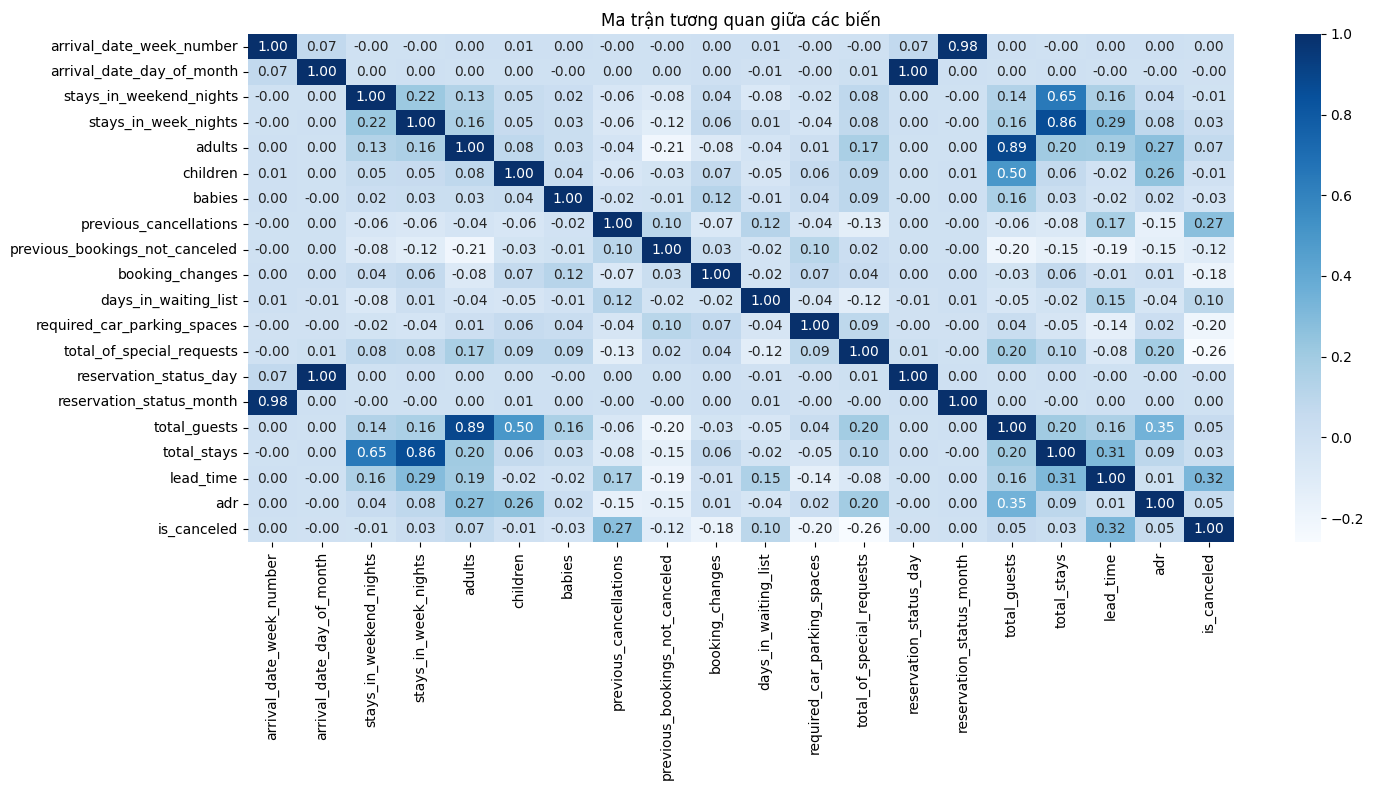

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Ma trận tương quan giữa các biến")
plt.tight_layout()
plt.show()

* Nhận xét:
    - Các biến total_stays, total_guest được tạo bởi các biến stays_in_weekend_nights, stays_in_week_nights, adults, children, babies nên có tương quan mạnh với các biến này.
    - Các biến về thời gian nhưu arrival_date_week_number và reservation_status_month có mối tương quan rất mạnh với nhau vì cùng thể hiện yếu tố thời gian --> có thể gây ra đa cộng tuyến.
    - has_company và has_agent có mối tương quan khá mạnh với nhau (-0.6) vì theo thực thế khách đặt qua công ty thì không đặt qua đại lý và ngược lại --> đây là hai nhóm khách khác nhau rõ rệt và điều này có để gây ra đa cộng tuyến.
    - Hầu như các biến có độ tương quan khá yếu với biến mục tiêu. Tuy nhiên lead_time có độ tương quan trung bình với biến mục tiêu phản ánh khách đặt sớm (0.32), thời gian đặt càng sớm thì xác suất hủy càng lớn vì có nhiều thời gian để thay đổi kế hoạch bất chợt hoặc phát sinh ý định khác.
    - các biến yêu cầu của khách hàng có tương quan âm với biến mục tiêu cho thấy khách hàng có nhiều yêu cầu thì sẽ có sự chuẩn bị, kế hoạch rõ ràng hơn --> ít khả năng hủy.

### Biến định lượng & biến mục tiêu

#### lead_time

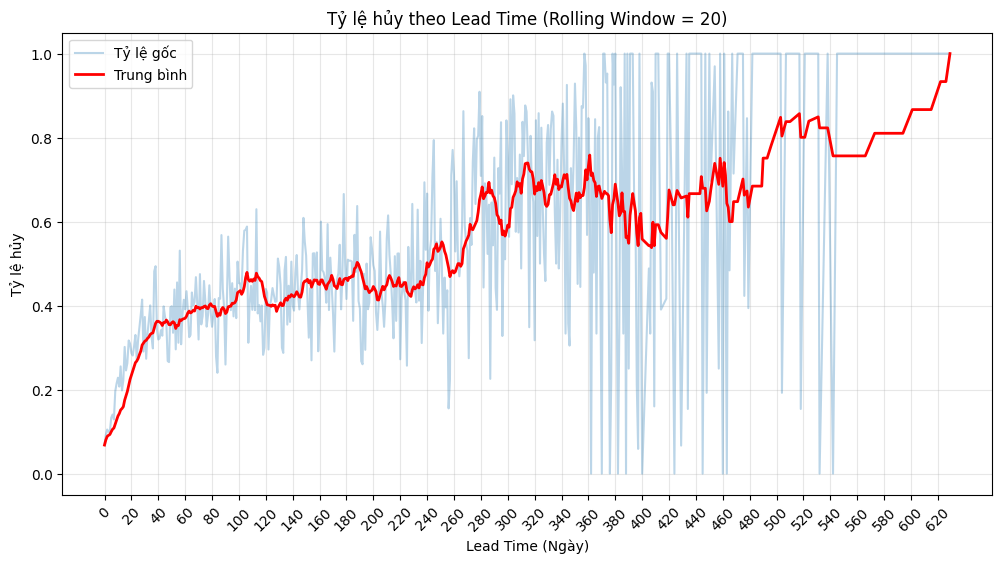

In [46]:
lead_time_cancel_rate = df.groupby('lead_time')['is_canceled'].mean()

rolling_cancel_rate = lead_time_cancel_rate.rolling(window=15, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(lead_time_cancel_rate.index, lead_time_cancel_rate.values, alpha=0.3, label='Tỷ lệ gốc')
plt.plot(rolling_cancel_rate.index, rolling_cancel_rate.values, color='red', linewidth=2, label='Trung bình')

plt.title('Tỷ lệ hủy theo Lead Time (Rolling Window = 20)')
plt.xlabel('Lead Time (Ngày)')
plt.ylabel('Tỷ lệ hủy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, int(lead_time_cancel_rate.index.max())+1, 20), rotation=45)
plt.show()

- Do phân phối lead_time lệch phải rất lớn nên tỷ lệ hủy ở đoạn 240 - 620 biến động mạnh, nhưng tổng quát là xu hướng đi lên ổn định.
- 0 - 40 tốc độ tăng lớn (độ dốc cao), nhưng vẫn trong mức bình thường < 40%.
- 40 - 260 ngày tỷ lệ hủy vào vùng bão hòa quanh mức 45%.
- 260 - 620 ngày đột phát lên ngưỡng báo động >60%.

=> lead_time càng dài, tỉ lệ hủy càng tăng.

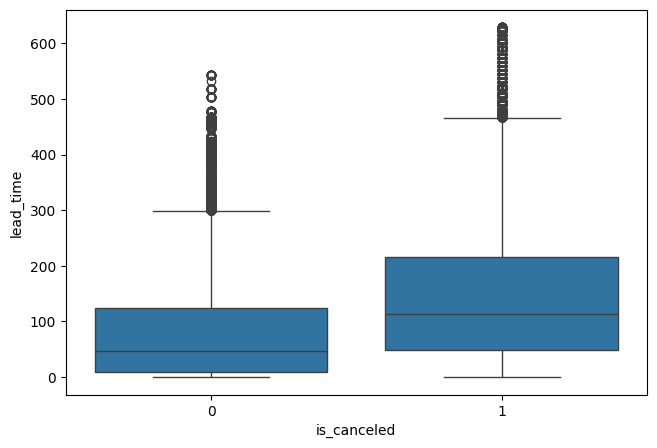

In [47]:
plt.figure(figsize=(7.5,5))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.show()


### Biến nhị phân & biến mục tiêu

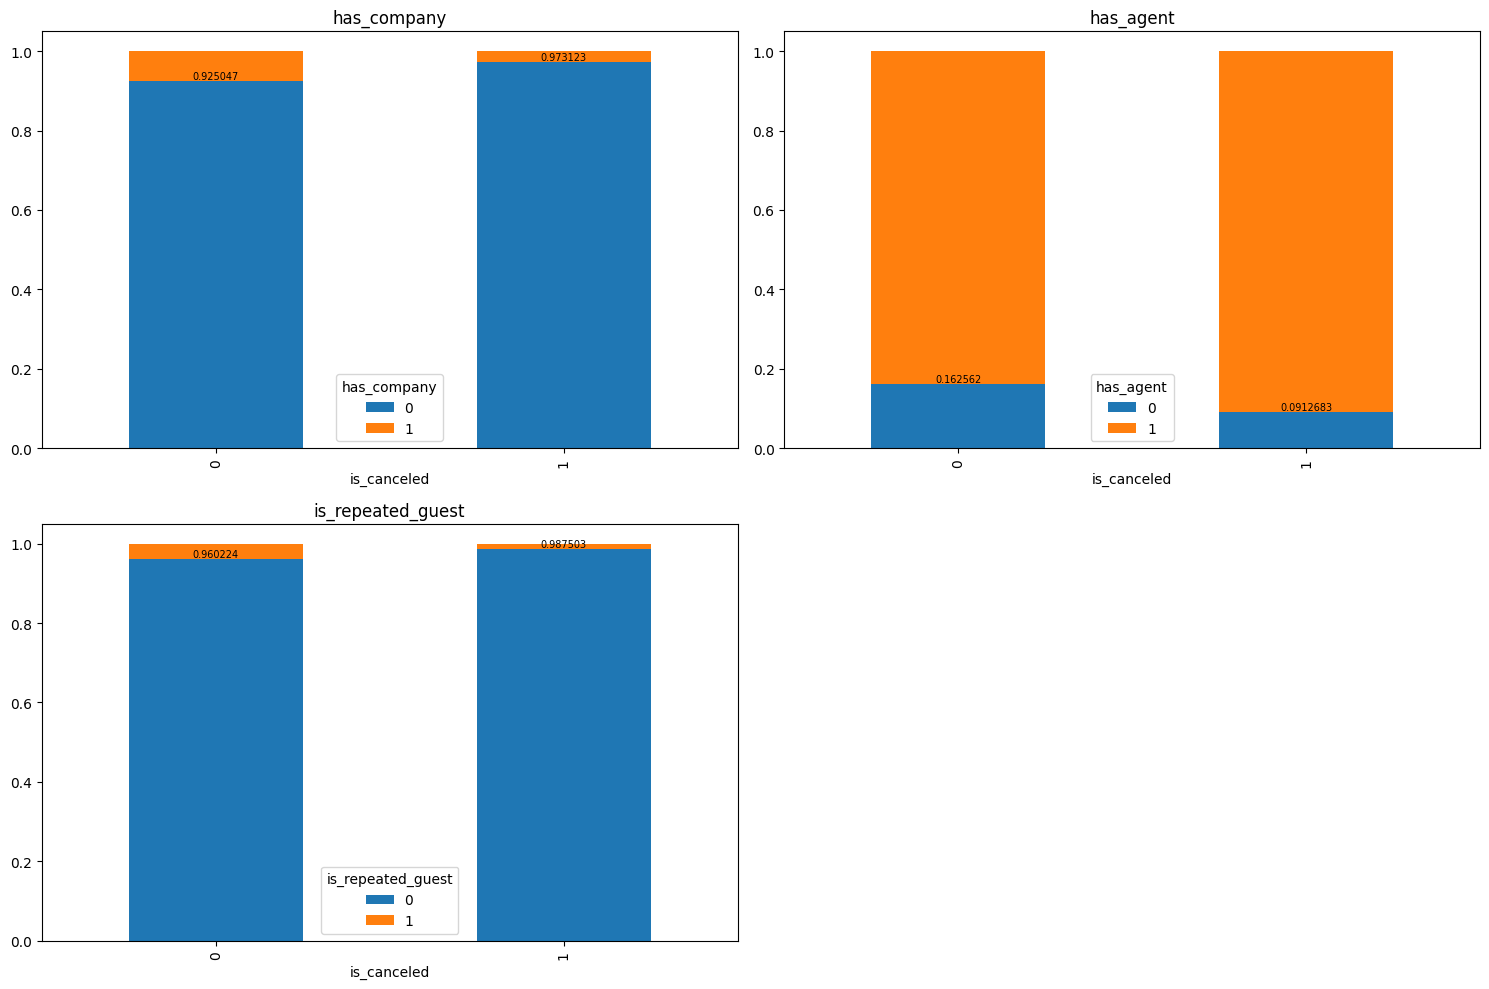

In [48]:
columns = ['has_company', 'has_agent', 'is_repeated_guest']

fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]
    df.groupby('is_canceled')[col].value_counts(normalize=True).unstack().plot(
        kind='bar', stacked=True, ax=ax
    )
    ax.bar_label(ax.containers[0], fontsize=7)
    ax.set_title(col)

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### deposit_type

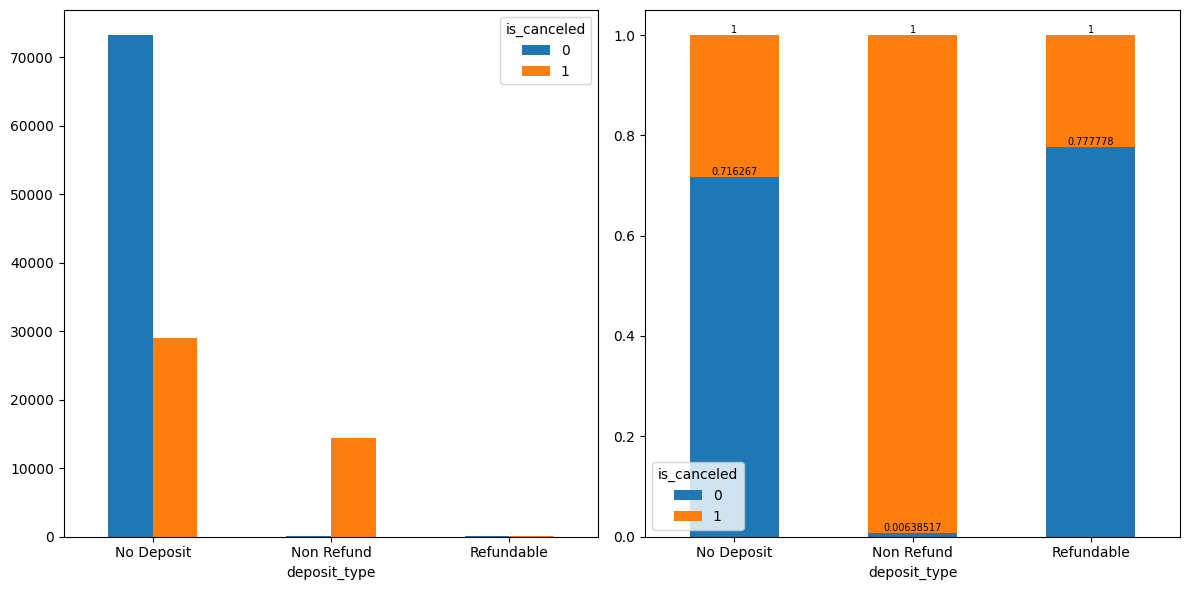

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes = axes.flatten()

df.groupby('deposit_type')['is_canceled'].value_counts().unstack().plot(
    kind='bar', stacked=False, ax=axes[0])
axes[0].tick_params(axis='x', rotation=0)

df.groupby('deposit_type')['is_canceled'].value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[1])

for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=7)

axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

* insight thú vị: dù đa số khách hàng vẫn chọn Loại đặt cọc là không cần cọc, nhưng nghịch lý khi họ phải đặt cọc không hoàn lại (non refund) thì vẫn sẵn sàng hủy phòng mất tiền, tỉ lệ hủy phòng gần như 100%.

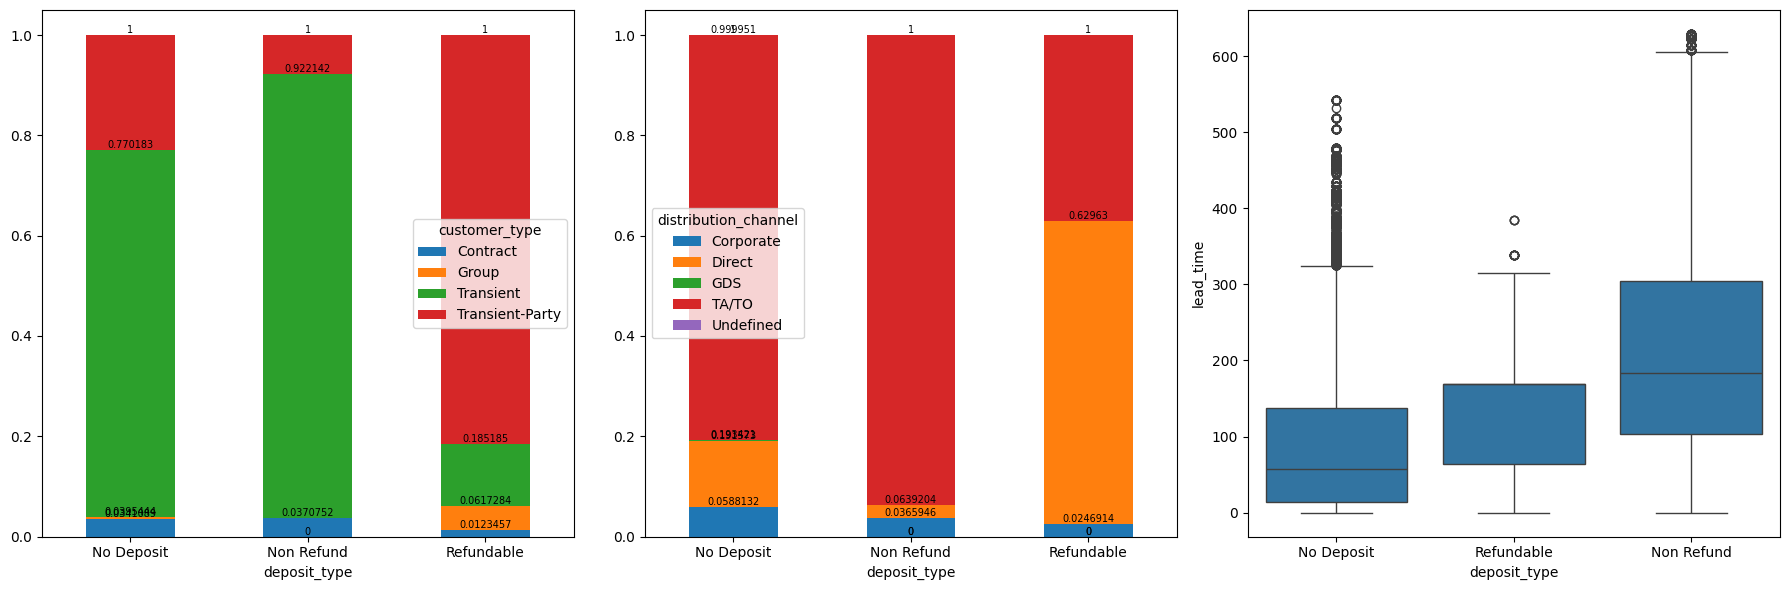

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes = axes.flatten()

# Biểu đồ 1: deposit_type vs customer_type (stacked %)
df.groupby('deposit_type')['customer_type'].value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[0]
)
for container in axes[0].containers:
    axes[0].bar_label(container, fontsize=7)
axes[0].tick_params(axis='x', rotation=0)

# Biểu đồ 2: deposit_type vs distribution_channel (stacked %)
df.groupby('deposit_type')['distribution_channel'].value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=axes[1]
)
for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=7)
axes[1].tick_params(axis='x', rotation=0)

# Biểu đồ 3: boxplot deposit_type vs lead_day
sns.boxplot(x='deposit_type', y='lead_time', data=df, ax=axes[2])
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Biến định tính & biến định tính

#### previous_cancellations_group & biến mục tiêu

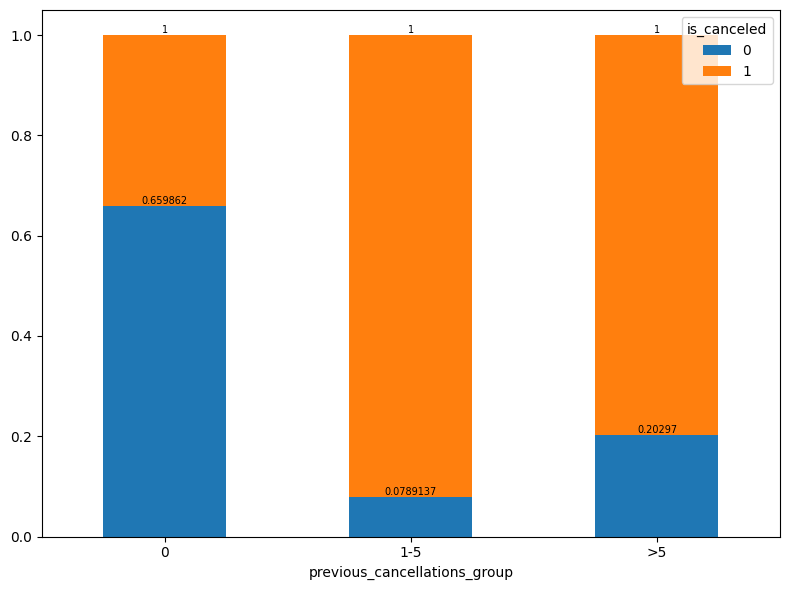

In [52]:
fig, ax = plt.subplots(figsize=(8,6))

df.groupby('previous_cancellations_group')['is_canceled'].value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, ax=ax)

for container in ax.containers:
    ax.bar_label(container, fontsize=7)
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

số lần hủy trước càng nhiều, khả năng hủy hiện tại càng cao

#### country & biến mục tiêu

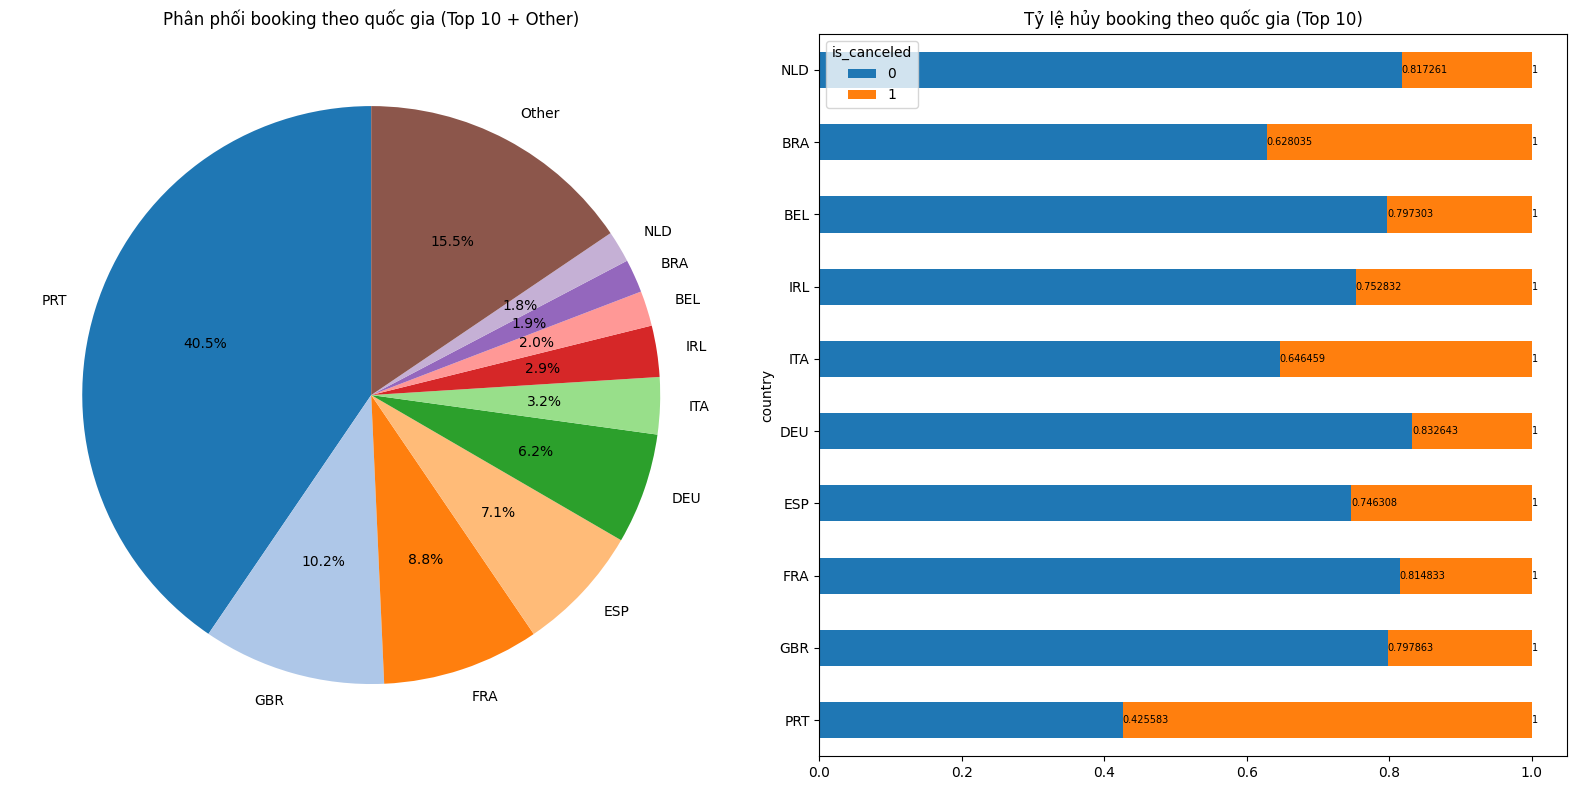

In [72]:
# Đếm số lượng booking theo country
country_counts = df['country'].value_counts()

# Lấy top 10 quốc gia
top10 = country_counts.nlargest(10)
other = pd.Series({'Other': country_counts.iloc[10:].sum()})
pie_data = pd.concat([top10, other])

# Tạo bảng màu đủ khác biệt
colors = plt.cm.tab20.colors[:len(pie_data)]  # tab20 có 20 màu khác nhau

# Lấy top 10 quốc gia có nhiều booking nhất
top10_names = top10.index
df_top10 = df[df['country'].isin(top10_names)]

# Tính tỷ lệ phần trăm hủy/không hủy theo country
counts = df_top10.groupby('country')['is_canceled'].value_counts(normalize=True).unstack().fillna(0)

# Sắp xếp theo số lượng booking (phân phối)
counts = counts.loc[country_counts[top10_names].sort_values(ascending=False).index]

# Tạo subplot 1 hàng 2 cột
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Biểu đồ 1: Pie chart
axes[0].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Phân phối booking theo quốc gia (Top 10 + Other)')

# Biểu đồ 2: Bar chart stacked ngang
counts.plot(kind='barh', stacked=True, ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=7)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].set_title('Tỷ lệ hủy booking theo quốc gia (Top 10)')

plt.tight_layout()
plt.show()

Nước có tỉ lệ hủy cao nhất đồng thời cũng là nước có số lượng đặt phòng nhiều nhất


##### Hotel & market_segment

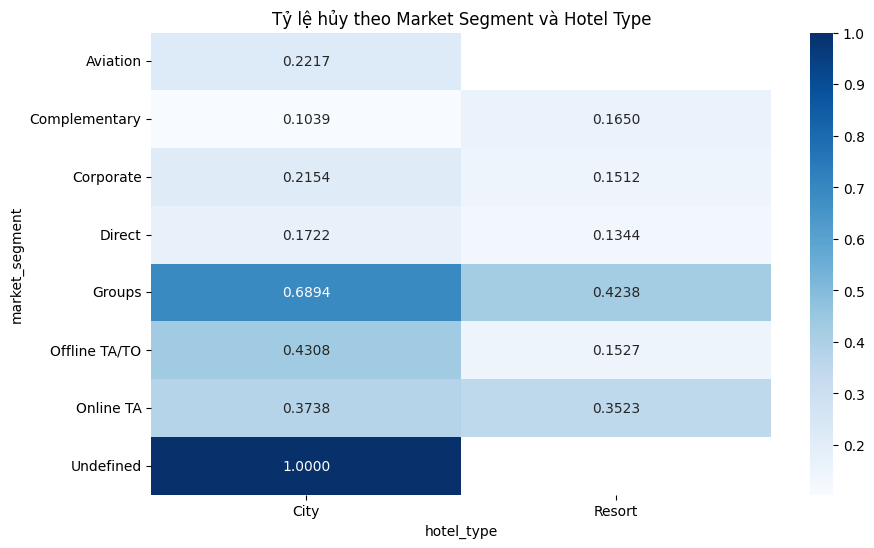

In [54]:
cancel_rate = df.pivot_table(index="market_segment", columns="hotel_type", values="is_canceled", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(cancel_rate, annot=True, cmap="Blues", fmt=".4f")
plt.title("Tỷ lệ hủy theo Market Segment và Hotel Type")
plt.show()

In [55]:
df[(df["market_segment"] == "Undefined")]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reservation_status_day,reservation_status_month,reservation_status_year,hotel_type,previous_cancellations_group,previous_bookings_not_canceled_group,booking_changes_group,days_in_waiting_list_group,total_guests,total_stays
39227,1,2,2024,June,24,16,1,0,2,0,...,16,6,2024,City,0,0,0,no_wait,2,1
39304,1,1,2024,September,39,26,0,2,3,0,...,26,9,2024,City,0,0,0,no_wait,3,2


* Nhận xét:
    - phân khúc thị trường là group và online TA có tỷ lệ hủy cao hơn tỷ lệ không hủy ở cả 2 loại khách sạn. Ngoài ra offline TA/TO gần 50% tỷ lệ hủy ở khách sạn city.
    - Nhóm undefinded chỉ xuất hiện ở khách sạn city và 100% hủy đặt phòng. Trường hợp này có thời gian đặt phòng sát và không đặt cọc --> có thể do thử đặt phòng chớ không thực sự đặt để ở.
    - phân khúc khách theo đoàn cũng có rủi ro rất cao ở cả hai khách sạn, đặc biệt ở city (68.94%) cho thấy khách theo đoàn thường dễ thay đổi kế hoạch hoặc đặt trước rồi hủy kéo theo cả đoàn hủy.
    - Phân khúc đặt trực tiếp và nhóm bổ sung có tỷ lệ hủy thấp và ổn định ở 2 loại khách sạn. --> nhóm có rủi ro thấp.

--> Nhận xét: khách sạn city có rủi ro cao hơn resort hầu hết ở các phân khúc thị trường đặt booking.

##### market_segment & biến mục tiêu

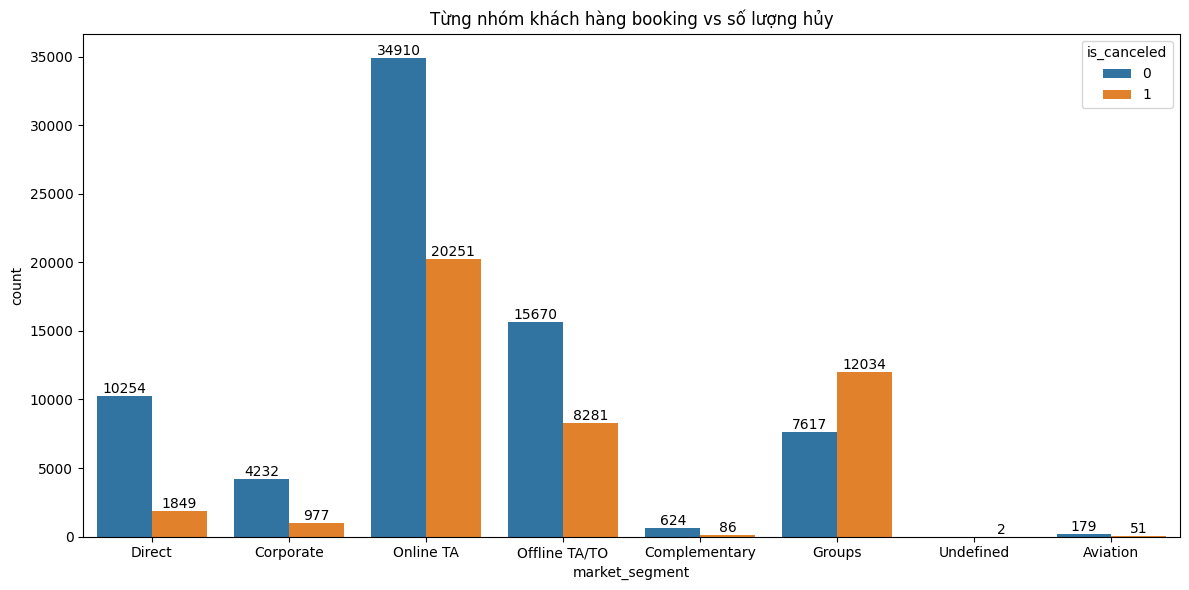

In [56]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="market_segment", hue="is_canceled", data=df)
plt.title("Từng nhóm khách hàng booking vs số lượng hủy")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

In [57]:
table_market = pd.crosstab(df["market_segment"], df["is_canceled"])
chi2, p_value, dof, ex = chi2_contingency(table_market)
print("Chi2= ", chi2)
print("p_value= ", p_value)

Chi2=  8402.2354779897
p_value=  0.0


* Nhận xét:
    - Kiểm định chi-2 cho kết quả giá trị thống kê lớn (chi2=8402) và p-value rất nhỏ <0.05 cho thấy sự khác biệt giữa các loại booking có ý nghĩa thống kê, không phải ngẫu nhiên.
    - Dựa vào biểu đồ, Groups có số lượng hủy cao hơn không hủy trong khi các loại còn lại có số lượng booking không hủy cao hơn. Ngoài ra khách ưu chuộng booking qua online TA nhất rồi đến offline TA/TO.
    - Ngoài ra có trường hợp undefined chưa xác định nên vì vậy tỷ lệ hủy là tuyệt đối và undefined chỉ xuất hiện ở khách sạn city.

    --> Phân khúc Groups có rủi ro hủy cao hơn so với các loại còn lại mặc dù số lượng booking của group không phải cao nhất --> có thể đưa vào insight.

#### hotel & customer_type

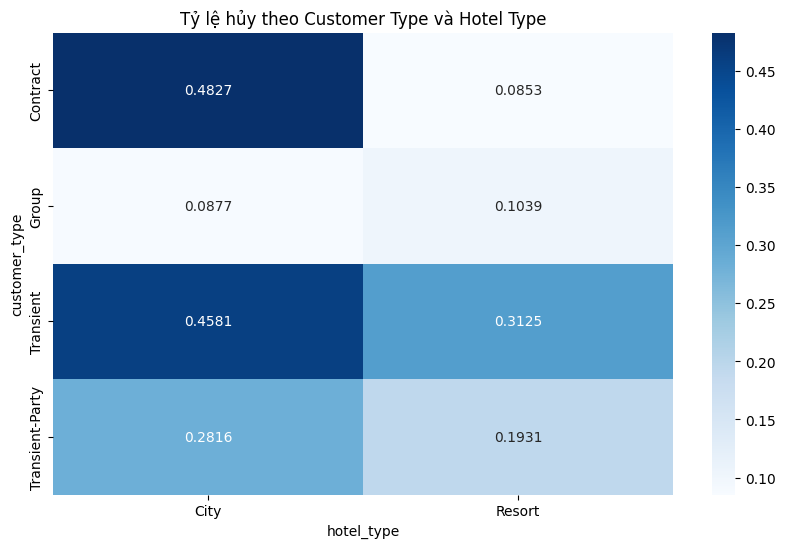

In [58]:
cancel_rate = df.pivot_table(index="customer_type", columns="hotel_type", values="is_canceled", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(cancel_rate, annot=True, cmap="Blues", fmt=".4f")
plt.title("Tỷ lệ hủy theo Customer Type và Hotel Type")
plt.show()

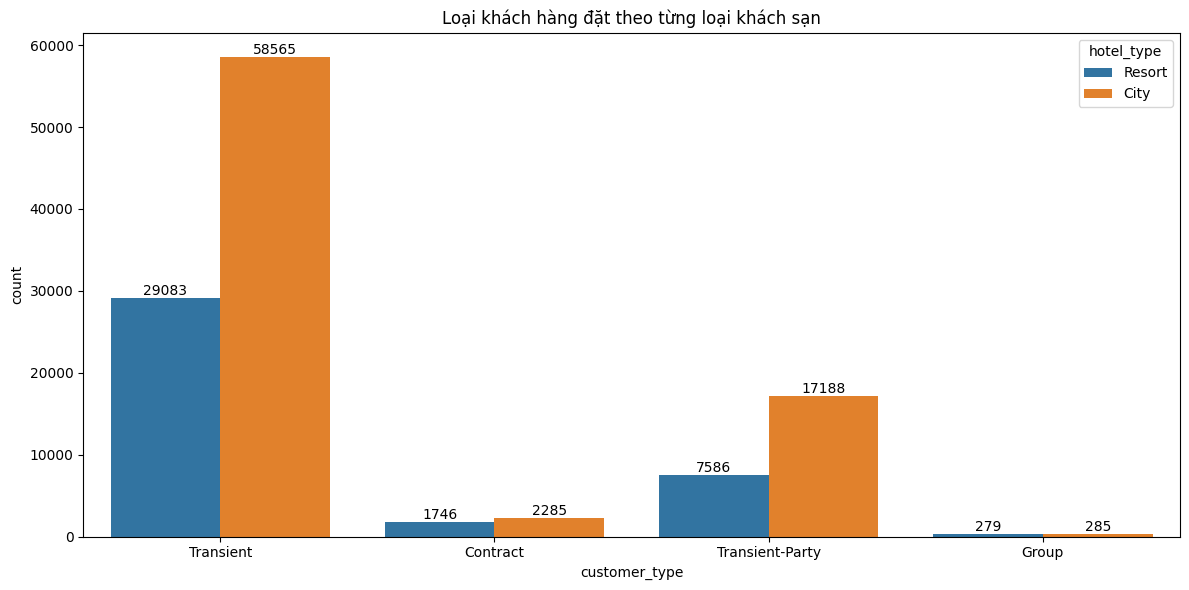

In [59]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="customer_type", hue="hotel_type", data=df)
plt.title("Loại khách hàng đặt theo từng loại khách sạn")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

* Nhận xét:
    - Ở khách sạn thành phố có xu hướng hủy phòng nhiều hơn khách sạn nghỉ dưỡng. Tuy nhiên, khách theo nhóm ở khách sạn resort có tỷ lệ hủy coa hơn nhưng không đáng kể.
    - Khách theo hợp đồng chiếm số lượng ít hơn khách lẻ nhưng lại có rủi ro cao hơn.
    
    --> Đa phần khách hàng là khách lẻ và có xu hướng đặt phòng ở khách sạn city hơn resort và vì có số lượng lớn nên City có tỷ lệ hủy cao hơn resort.

#### hotel & deposit_type

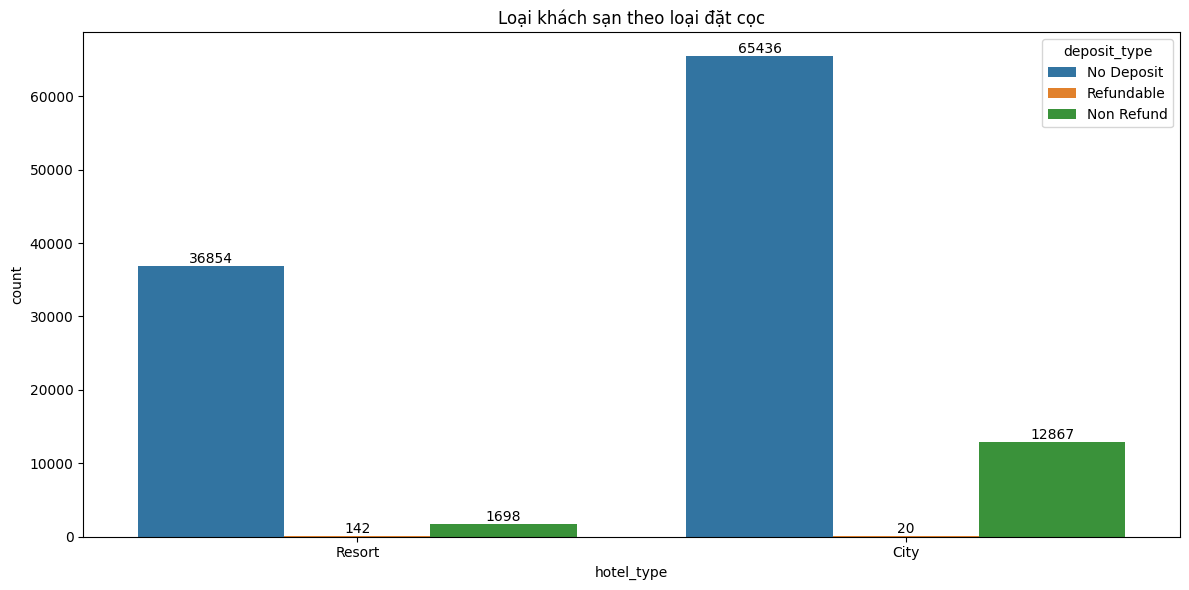

In [60]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="hotel_type", hue="deposit_type", data=df)
plt.title("Loại khách sạn theo loại đặt cọc")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

In [61]:
df[(df["deposit_type"] == "Non Refund") & (df["is_canceled"] == 1)]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reservation_status_day,reservation_status_month,reservation_status_year,hotel_type,previous_cancellations_group,previous_bookings_not_canceled_group,booking_changes_group,days_in_waiting_list_group,total_guests,total_stays
2078,1,87,2024,June,24,15,0,1,2,0,...,15,6,2024,Resort,0,0,0,no_wait,2,1
2079,1,87,2024,September,38,22,0,1,2,0,...,22,9,2024,Resort,0,0,0,no_wait,2,1
2080,1,87,2024,October,40,1,0,1,2,0,...,1,10,2024,Resort,0,0,0,no_wait,2,1
2081,1,87,2024,May,21,24,0,1,2,0,...,24,5,2024,Resort,0,0,0,no_wait,2,1
2086,1,87,2024,December,51,21,0,1,2,0,...,21,12,2024,Resort,0,0,0,no_wait,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81140,1,177,2024,August,32,11,2,0,2,0,...,11,8,2024,City,1-5,0,0,no_wait,2,2
81141,1,177,2024,December,52,26,2,0,2,0,...,26,12,2024,City,1-5,0,0,no_wait,2,2
81142,1,177,2024,September,38,20,2,0,2,0,...,20,9,2024,City,1-5,0,0,no_wait,2,2
81143,1,177,2024,October,41,10,2,0,2,0,...,10,10,2024,City,1-5,0,0,no_wait,2,2


In [62]:
df[(df["deposit_type"] == "Refundable") & (df["is_canceled"] == 1)]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reservation_status_day,reservation_status_month,reservation_status_year,hotel_type,previous_cancellations_group,previous_bookings_not_canceled_group,booking_changes_group,days_in_waiting_list_group,total_guests,total_stays
4621,1,169,2024,May,20,13,1,3,2,0,...,13,5,2024,Resort,0,0,0,no_wait,2,4
4626,1,169,2024,August,34,25,1,3,2,0,...,25,8,2024,Resort,0,0,0,no_wait,2,4
4627,1,169,2024,January,4,27,1,3,2,0,...,27,1,2024,Resort,0,0,0,no_wait,2,4
4628,1,169,2024,January,2,11,1,3,2,0,...,11,1,2024,Resort,0,0,0,no_wait,2,4
4629,1,169,2024,July,27,4,1,3,2,0,...,4,7,2024,Resort,0,0,0,no_wait,2,4
4634,1,169,2024,November,48,30,1,3,2,0,...,30,11,2024,Resort,0,0,0,no_wait,2,4
4645,1,169,2024,May,19,8,1,3,2,0,...,8,5,2024,Resort,0,0,0,no_wait,2,4
4646,1,169,2024,January,1,1,1,3,2,0,...,1,1,2024,Resort,0,0,0,no_wait,2,4
8389,1,385,2024,April,15,14,0,1,2,0,...,14,4,2024,Resort,0,0,1-2,no_wait,2,1
10645,1,25,2024,May,22,28,2,7,2,0,...,28,5,2024,Resort,0,0,1-2,no_wait,2,9


* Nhận xét:
    - Loại hình không cần đặt cọc ở cả hai khách sạn chiếm đa số --> xu hướng khách hàng ưa chuộng không cọc khi đặt phòng hơn. Xu hướng ưa chuộng thứ hai là Non Refund là không hoàn tiền chứ không phải refundable là được hoàn tiền --> Thông thường, không ai muốn phải mất tiền nên thường ưa chuộng không đặt cọc và được hoàn tiền hơn. Ở dữ liệu này thì số lượng không được hoàn tiền lại chiếm nhiều hơn hoàn tiền --> Theo thực tế, điều này khá bất thường có thể do là vào các kỳ nghỉ nên không có nhiều chính sách hoàn tiền (dữ liệu tập trung ở các thang cuối năm và tháng đầu năm)
    
    --> Nhận xét: Khách hàng thường đặt phòng mà không cần cọc. Ngoài ra khách chọn Non Refund nhiều hơn Refundable nhiều hơn có thể do có giá tốt hơn.

#### customer_type & biến mục tiêu

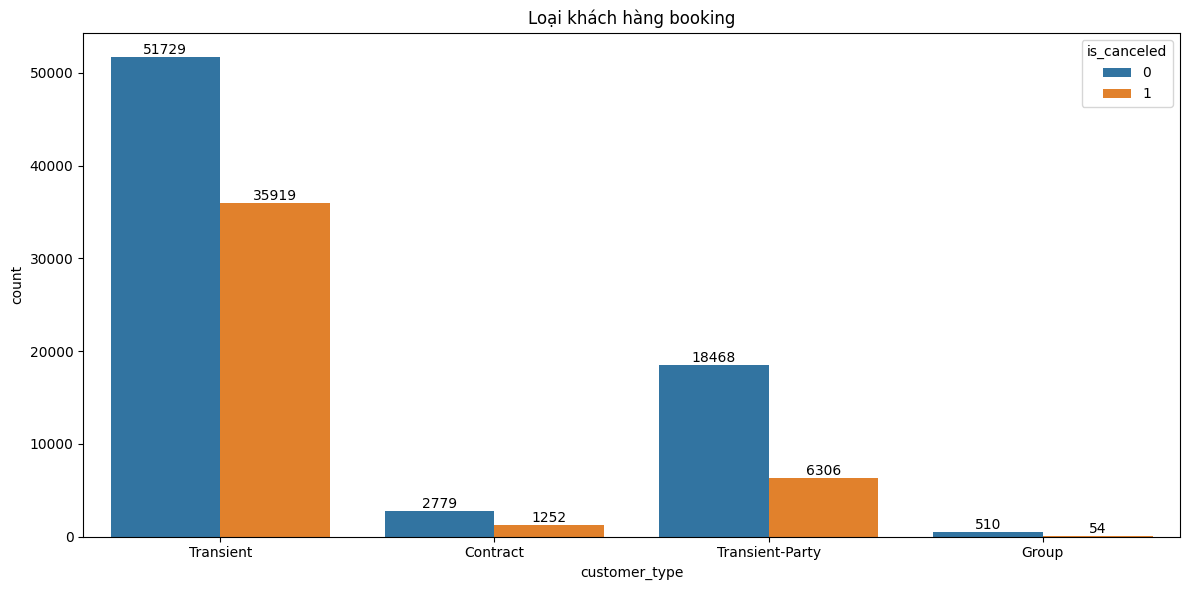

In [63]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="customer_type", hue="is_canceled", data=df)
plt.title("Loại khách hàng booking")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

In [64]:
table_customer = pd.crosstab(df["customer_type"], df["is_canceled"])
chi2, p_value, dof, ex = chi2_contingency(table_customer)
print("Chi2= ", chi2)
print("p_value= ", p_value)

Chi2=  2248.7157169283437
p_value=  0.0


* Nhận xét:
    - Dựa trên kết quả kiểm định, cho thấy tỷ lệ hủy phòng khác nhau giữa các nhóm không phải ngẫu nhiên.
    - Dựa vào các biểu đồ, cho thấy:
        - Khách lẻ ở cả hai loại khách sạn chiếm đa số và hủy nhiều nhất, là nhóm rủi ro lớn nhất.
        - Nhóm nhỏ và hợp đồng có tỷ lệ hủy vừa phải, còn khách đoàn hủy ít.
        - Xét theo loại khách sạn thì 4 loại khách hàng đều có tỷ lệ hủy cao ở khách sạn City.
    
    --> Khách lẻ là nhóm rủi ro cao nhất về hủy phòng, do vừa chiếm số lượng lớn vừa có số booking hủy cao, đặc biệt tại khách sạn City và mức độ cam kết không hủy phòng của City thấp.

#### hotel_type & deposit_type & lead_bin & is_canceled

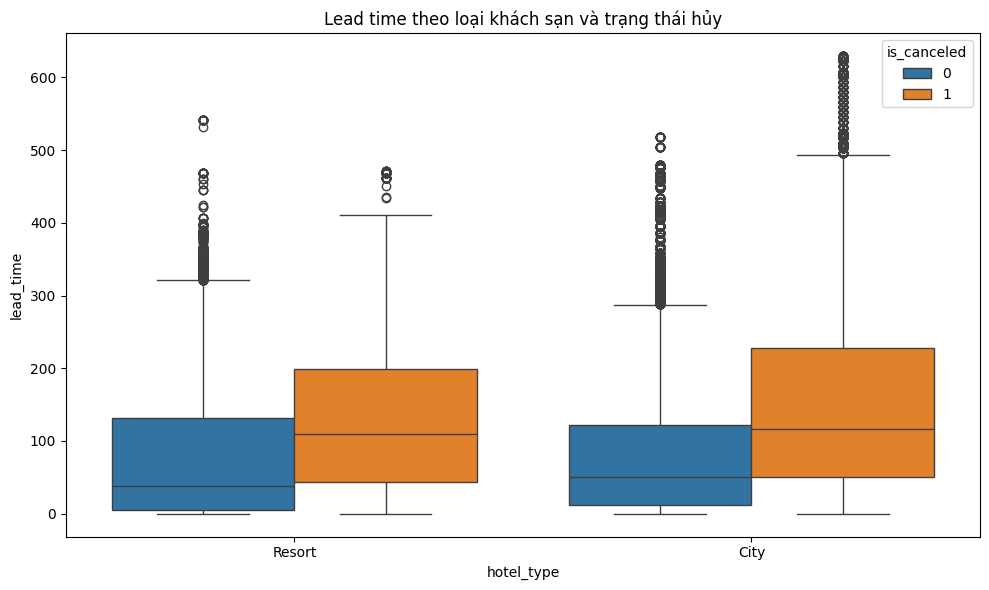

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="hotel_type",
    y="lead_time",
    hue="is_canceled"
)
plt.title("Lead time theo loại khách sạn và trạng thái hủy")
plt.tight_layout()
plt.show()

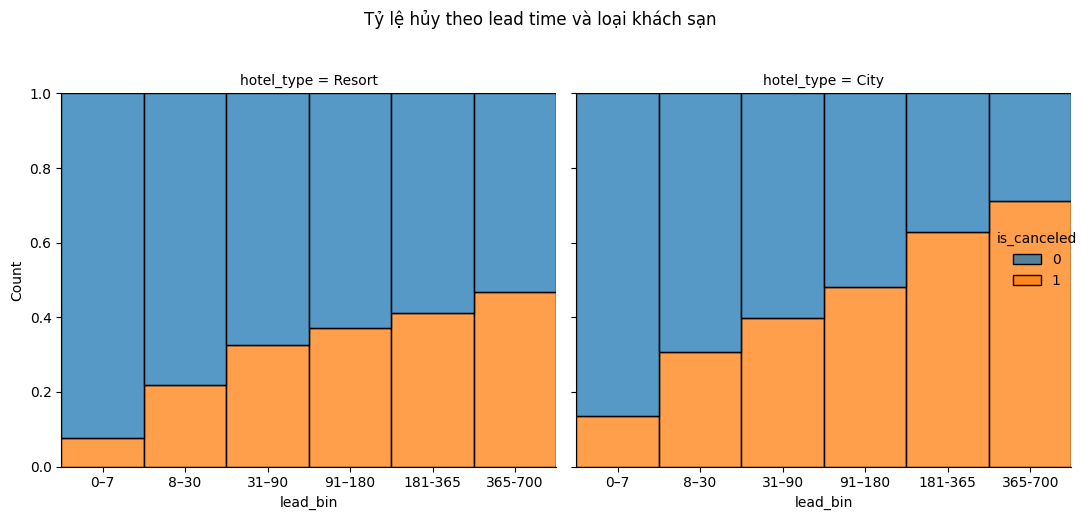

In [66]:
df["lead_bin"] = pd.cut(df["lead_time"], bins=[0,7,30,90,180,365,700], labels=["0–7","8–30","31–90","91–180","181-365","365-700"])
g = sns.displot(
    data=df,
    x="lead_bin",
    hue="is_canceled",
    multiple="fill",
    col="hotel_type"
)
g.fig.suptitle("Tỷ lệ hủy theo lead time và loại khách sạn", y=1.03)
g.fig.tight_layout()
plt.show()

/tmp/ipython-input-3952940537.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group = cancel.groupby(["hotel_type", "deposit_type", "lead_bin"]).size().reset_index(name="cancel_count")


<Figure size 1200x600 with 0 Axes>

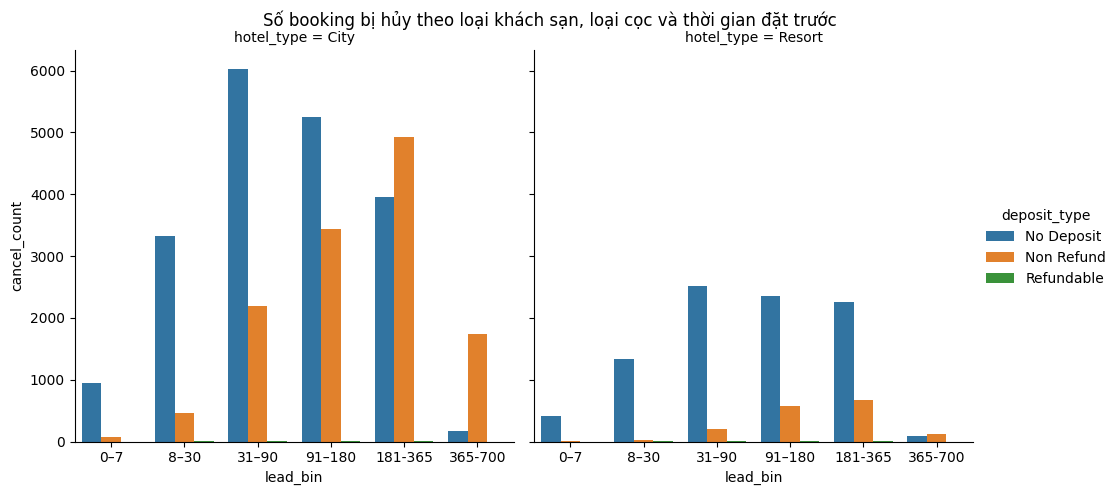

In [67]:
cancel = df[df["is_canceled"] == 1]
df_group = cancel.groupby(["hotel_type", "deposit_type", "lead_bin"]).size().reset_index(name="cancel_count")
plt.figure(figsize=(12,6))
sns.catplot(
    x="lead_bin",
    y="cancel_count",
    hue="deposit_type",
    col="hotel_type",
    data=df_group,
    kind="bar",
    height=5,
    aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Số booking bị hủy theo loại khách sạn, loại cọc và thời gian đặt trước")
plt.show()

* Nhận xét:
    - Ở khách sạn nghỉ dưỡng (resort), thời gian đặt trước càng dài thì tỷ lệ hủy càng tăng nhưng số lượng hủy vẫn ít hơn số lượng không hủy và số lượng hủy do không cọc chiếm đa số hơn. Ngược lại khách sạn thành phố (city) có thời gian đặt trước càng dài thì tỷ lệ hủy càng cao (số lương hủy lớn khi thời gian đặt trước từ 3 tháng trở lên) và tùy theo thời gian đặt sớm mà số lượng hủy theo loại đặt cọc có khác biệt rõ, đặt càng sớm thì ở loại hình không hoàn tiền chiếm số lượng hủy nhiều hơn.
    - Ngoài ra, ở hai loại khách sạn vẫn có trường hợp thời gian đặt rất sớm nhưng không hủy cho thấy những trường hợp này có thể là khách đặt du lịch vì có kế hoạch cụ thể trước đó.
    --> Thời gian đặt trước, loại hình đặt cọc và loại khách sạn có ảnh hưởng lớn đến tỷ lệ hủy phòng. Thường đặt càng sớm nhất là ở khách sạn thành phố thì tỷ lệ hủy ở loại không hoàn tiền sẽ càng cao.

#### Hotel & Month_reservation & adr

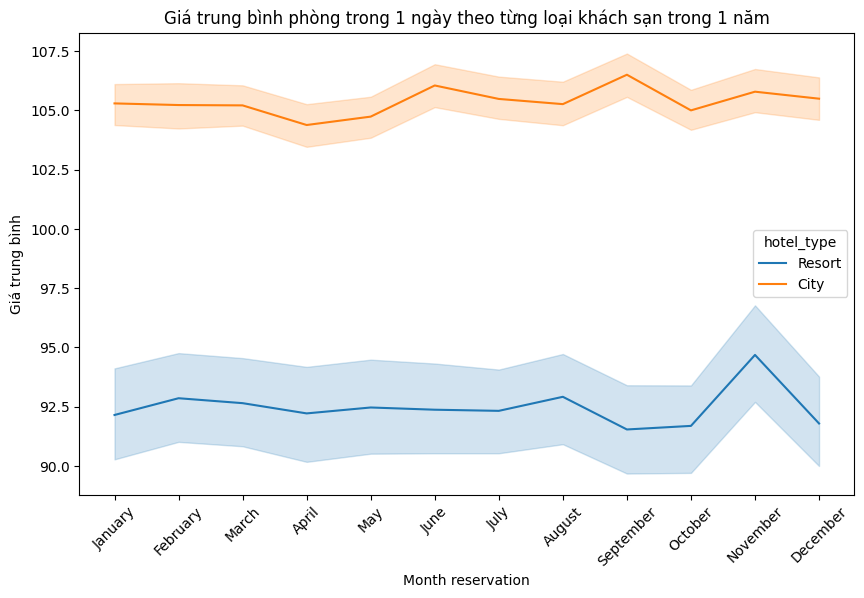

In [68]:
month_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
df["arrival_date_month"] = pd.Categorical(df["arrival_date_month"],categories=month_order,ordered=True)
plt.figure(figsize=(10, 6))
sns.lineplot(x="arrival_date_month", y="adr", hue="hotel_type", data=df)
plt.title("Giá trung bình phòng trong 1 ngày theo từng loại khách sạn trong 1 năm")
plt.xlabel("Month reservation")
plt.xticks(rotation=45)
plt.ylabel("Giá trung bình")
plt.show()

* Nhận xét:
    - Giá trung bình 1 ngày theo từng phòng ở khách sạn city cao hơn resort xuyên suốt 1 năm. Và khoảng biến thiên của resort rộng hơn city cho thấy giá resort có độ biến động giữa các phân khúc hơn so với city (city có độ biến thiên nhỏ --> ổn định hơn).
    - Phân bố giá của hai loại khách sạn cũng có khác biệt đáng kể. Ở tháng 8 đến tháng 10 khách sạn resort có giá giảm rồi tăng trong khi city thì tăng rồi giảm. Ngoài ra ở khách sạn city, giá cao nhất rơi vào tháng 9 (tháng thấp nhất ở khách sạn resort) trong khi resort có giá tăng cao và đạt đỉnh ở tháng 11. --> Giá ở 2 loại khách sạn theo từng tháng có sự khác nhau.
    
    --> City có mức giá ổn định, cao hơn resort và không biến động mạnh ở các tháng cuối năm.